Finex is a leading financial services provider headquartered in Florida, US. The company offers a wide range of banking products and services through multiple channels, including in‑person branches, ATMs, and online platforms. Over the years, Finex has built a strong customer base, but it is currently facing a major challenge: rising incidents of credit and debit card fraud. These fraudulent activities—ranging from ATM skimming to unauthorized online transactions—have not only eroded customer trust but also caused significant financial losses for the bank. To safeguard its reputation and profitability, Finex is now exploring advanced technological solutions such as machine learning to detect and prevent fraud more effectively.

## Problem Statement
-  Finex is facing significant revenue losses due to increasing credit/debit card fraud.

-  Fraudsters exploit stolen/lost cards, ATM skimming, and system hacks to perform unauthorized transactions.

-  Customers often detect fraud late, leading to delayed complaint registration and higher financial liability for the bank.

-  Current systems lack real‑time monitoring and advanced fraud detection capabilities.

-  The absence of modern financial technologies makes it difficult to track and prevent fraudulent activities effectively.

## Business Objective
-  Build a machine learning–based fraud detection system to identify suspicious transactions in real time.

-  Minimize financial losses by flagging and preventing unauthorized activities before they escalate.

-  Enhance customer trust and satisfaction by proactively protecting sensitive financial data.

-  Strengthen Finex’s technological infrastructure to handle large transaction volumes securely.

-  Support long‑term revenue growth by reducing fraud‑related risks and improving operational efficiency.

## Assignment Tasks

1. Data Preparation
2. Data Cleaning
3. Train Validation Split 70-30
4. Perform EDA
5. Model Building or Hyperparameter Tuning:
6. Model Evaluation
7. Predicting and Model Evaluation

## Data Dictionary

 1   trans_date_trans_time : date time of the transaction

 2   cc_num                : Credit Card Number

 3   merchant         : Merchant Name where the transaction happened

 4   category         : Nature of the transaction took place such as health, personal    
 5   amt           : Amount of the transaction        
 6   first          : Name of the card holder      
 7   last           : Last Name of teh card holder        
 8   gender          : Gender of teh card holder        
 9   street          : Street Name where the transaction took place          
 10  city            : city code      
 11  state           : State Name     
 12  zip             : Zip code       
 13  lat             : latitude of the location         
 14  long            : Longitude of the location           
 15  city_pop        : Population of the city      
 16  job             : Occupation of the card hoder     
 17  dob             : date of birth of the card holder

 18  trans_num       : transaction_reference id

 19  unix_time       : Timestamp in Unix

 20  merch_lat       : Merchant Location latitude

 21  merch_long      : Merchant location longitude

 22  is_fraud        : Whether transaction is fraudulent or not

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
## Mount Google drive for data access
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
## Access fraud test data from Good Drive
fraud_df = pd.read_csv("/content/gdrive/MyDrive/fraudTest.csv")

## Data Preparation and Cleaning

In [5]:
fraud_df.shape

(555719, 23)

In [6]:
fraud_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [7]:
## Checking data types

fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [8]:
## Convert column "trans_date_trans_time"  and "dob" to required data type DateTime
fraud_df['trans_date_trans_time'] = pd.to_datetime(fraud_df['trans_date_trans_time'])
fraud_df['dob'] = pd.to_datetime(fraud_df['dob'], errors='coerce')
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Unnamed: 0             555719 non-null  int64         
 1   trans_date_trans_time  555719 non-null  datetime64[ns]
 2   cc_num                 555719 non-null  int64         
 3   merchant               555719 non-null  object        
 4   category               555719 non-null  object        
 5   amt                    555719 non-null  float64       
 6   first                  555719 non-null  object        
 7   last                   555719 non-null  object        
 8   gender                 555719 non-null  object        
 9   street                 555719 non-null  object        
 10  city                   555719 non-null  object        
 11  state                  555719 non-null  object        
 12  zip                    555719 non-null  int6

In [9]:
fraud_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [10]:
## Check for duplicate rows

duplicates = fraud_df.duplicated()
if duplicates.any():
    print("\nRedundant Rows Found:")
    print(fraud_df[duplicates])

In [11]:
## Check Value counts to see if data is balanced

for column in fraud_df.columns:
    valCount = fraud_df[column].value_counts()
    print("Columnn : ",column)
    print("Unique Values : ",valCount)
    print("**********************")

Columnn :  Unnamed: 0
Unique Values :  Unnamed: 0
555718    1
0         1
1         1
2         1
3         1
         ..
11        1
10        1
9         1
8         1
7         1
Name: count, Length: 555719, dtype: int64
**********************
Columnn :  trans_date_trans_time
Unique Values :  trans_date_trans_time
2020-12-17 20:36:39    4
2020-12-13 17:53:47    4
2020-10-05 19:37:49    4
2020-12-19 16:02:22    4
2020-09-19 11:03:40    3
                      ..
2020-08-25 13:17:52    1
2020-08-25 13:18:30    1
2020-08-25 13:18:36    1
2020-08-25 13:18:41    1
2020-08-25 13:16:17    1
Name: count, Length: 544760, dtype: int64
**********************
Columnn :  cc_num
Unique Values :  cc_num
6538441737335434       1474
4586810168620942       1466
4745996322265          1462
4587657402165341815    1458
2242542703101233       1428
                       ... 
4883407061576             9
4087542780207162          9
3540416671210051          8
4352307151555405069       7
4295296907373      

In [12]:
unique_count = fraud_df.nunique()
total_count = fraud_df.count()
percent_unique = (unique_count/ total_count) * 100
summary = pd.DataFrame({ 'Unique_Count': unique_count, 'Total_Count': total_count, 'Unique_Percentage': percent_unique.round(2) })
print(summary)

                       Unique_Count  Total_Count  Unique_Percentage
Unnamed: 0                   555719       555719             100.00
trans_date_trans_time        544760       555719              98.03
cc_num                          924       555719               0.17
merchant                        693       555719               0.12
category                         14       555719               0.00
amt                           37256       555719               6.70
first                           341       555719               0.06
last                            471       555719               0.08
gender                            2       555719               0.00
street                          924       555719               0.17
city                            849       555719               0.15
state                            50       555719               0.01
zip                             912       555719               0.16
lat                             910       555719

In [13]:
## We can drop columns which have higher percentage of unique columns with exception of timestamp as this will be needed for analysis : Columns yto be dropped "trans_num","Unnamed: 0","unix_time","merch_lat","merch_long"
fraud_df = fraud_df.drop(["trans_num","Unnamed: 0","unix_time"],axis=1).reset_index()
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   index                  555719 non-null  int64         
 1   trans_date_trans_time  555719 non-null  datetime64[ns]
 2   cc_num                 555719 non-null  int64         
 3   merchant               555719 non-null  object        
 4   category               555719 non-null  object        
 5   amt                    555719 non-null  float64       
 6   first                  555719 non-null  object        
 7   last                   555719 non-null  object        
 8   gender                 555719 non-null  object        
 9   street                 555719 non-null  object        
 10  city                   555719 non-null  object        
 11  state                  555719 non-null  object        
 12  zip                    555719 non-null  int6

In [14]:
## Check if any data is negative or not acceptable

fraud_df.describe()

,index,trans_date_trans_time,cc_num,amt,zip,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud
count,555719.000000,555719,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,555719,555719.000000,555719.000000,555719.000000
mean,277859.000000,2020-10-02 01:54:25.166780672,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1973-11-11 16:30:05.937173264,38.542798,-90.231380,0.003860
min,0.000000,2020-06-21 12:14:25,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1924-10-30 00:00:00,19.027422,-166.671575,0.000000
25%,138929.500000,2020-08-09 06:10:27.500000,1.800429e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1962-09-27 00:00:00,34.755302,-96.905129,0.000000
50%,277859.000000,2020-10-03 00:59:48,3.521417e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1975-11-30 00:00:00,39.376593,-87.445204,0.000000
75%,416788.500000,2020-12-01 03:03:04,4.635331e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1987-04-23 00:00:00,41.954163,-80.264637,0.000000
max,555718.000000,2020-12-31 23:59:34,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,2005-01-29 00:00:00,66.679297,-66.952026,1.000000
std,160422.401459,NaN,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,NaN,5.095829,13.733071,0.062008


In [15]:
fraud_df["CC_First_Number"] = fraud_df["cc_num"].astype(str).str[:2]
fraud_df

,index,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,CC_First_Number
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,33.986391,-81.200714,0,22
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,39.450498,-109.960431,0,35
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,40.495810,-74.196111,0,35
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,28.812398,-80.883061,0,35
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,44.959148,-85.884734,0,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,63453,40.4931,-91.8912,519,Town planner,1966-02-13,39.946837,-91.333331,0,30
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,77566,29.0393,-95.4401,28739,Futures trader,1999-12-27,29.661049,-96.186633,0,35
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,99323,46.1966,-118.9017,3684,Musician,1981-11-29,46.658340,-119.715054,0,60
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,83643,44.6255,-116.4493,129,Cartographer,1965-12-15,44.470525,-117.080888,0,40


In [16]:
cc_type = fraud_df["CC_First_Number"].unique()
cc_type

array(['22', '35', '30', '21', '57', '65', '49', '60', '45', '48', '37',
       '18', '43', '46', '50', '27', '67', '47', '41', '56', '36', '44',
       '42', '63', '55', '38', '34', '54', '40', '23', '58', '53', '51',
       '25', '24', '26', '52'], dtype=object)

## Map first two digits to card_types

22 → MasterCard

35 → JCB

30 → Diners Club

21 → (Not a standard prefix; likely invalid) - - Not Defined

57 → Maestro

65 → Discover

49 → Visa

60 → Discover/Maestro

45 → Visa

48 → Visa

37 → American Express

18 → (Not a standard prefix; likely invalid) - Not Defined

43 → Visa

46 → Visa

50 → Maestro

27 → MasterCard

67 → Maestro

47 → Visa

41 → Visa

56 → Maestro

36 → Diners Club

44 → Visa

42 → Visa

63 → Maestro

55 → MasterCard

38 → Diners Club

34 → American Express

54 → MasterCard

40 → Visa

23 → MasterCard

58 → Maestro

53 → MasterCard

51 → MasterCard

25 → MasterCard

24 → MasterCard

26 → MasterCard

52 → MasterCard

In [17]:
## Create a map to map the card type

card_map = { '22': 'MasterCard', '23': 'MasterCard', '24': 'MasterCard', '25': 'MasterCard', '26': 'MasterCard', '27': 'MasterCard', '30': 'Diners Club', '34': 'American Express', '35': 'JCB', '36': 'Diners Club', '37': 'American Express', '38': 'Diners Club', '40': 'Visa', '41': 'Visa', '42': 'Visa', '43': 'Visa', '44': 'Visa', '45': 'Visa', '46': 'Visa', '47': 'Visa', '48': 'Visa', '49': 'Visa', '50': 'Maestro', '51': 'MasterCard', '52': 'MasterCard', '53': 'MasterCard', '54': 'MasterCard', '55': 'MasterCard', '56': 'Maestro', '57': 'Maestro', '58': 'Maestro', '60': 'Discover/Maestro', '63': 'Maestro', '65': 'Discover', '67': 'Maestro','18': 'NotDefined','21': 'NotDefined' }

In [18]:
## Identify card types from first two digits

fraud_df["card_type"] = fraud_df["CC_First_Number"].map(card_map)
fraud_df.head()

,index,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,CC_First_Number,card_type
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,33.986391,-81.200714,0,22,MasterCard
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,39.450498,-109.960431,0,35,JCB
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,40.495810,-74.196111,0,35,JCB
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,28.812398,-80.883061,0,35,JCB
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,44.959148,-85.884734,0,35,JCB


In [19]:
unique_cc_type = fraud_df["card_type"].value_counts()
unique_cc_type

,count
card_type,
Visa,179818
JCB,101789
Diners Club,53989
American Express,53255
MasterCard,41113
NotDefined,39555
Maestro,38844
Discover/Maestro,29387
Discover,17969


Categorise customer into age categories using dob column


*   child(0-12)
*   Teen (13-18)
* young_adult (18-25)
*   adult (25-40)
*   middle age (40-58)
* senior-citizen(>60)

In [20]:
## Derive age from dob column
today = pd.to_datetime("today")
fraud_df['age'] = ( today.year - fraud_df['dob'].dt.year)
# Define bins and labels
bins = [0, 12, 18, 25, 40, 58, 200]
# upper bound safely high
labels = [ 'child_0_12', 'teen_13_18', 'young_adult_19_25', 'adult_26_40', 'middle_age_41_58', 'senior_citizen_60_plus' ]
 # Categorize into age groups
fraud_df['age_category'] = pd.cut(fraud_df['age'], bins=bins, labels=labels, right=True)
# Preview
fraud_df[['dob', 'age', 'age_category']].head()

,dob,age,age_category
0,1968-03-19,58,middle_age_41_58
1,1990-01-17,36,adult_26_40
2,1970-10-21,56,middle_age_41_58
3,1987-07-25,39,adult_26_40
4,1955-07-06,71,senior_citizen_60_plus


In [21]:
fraud_df['age_category'].value_counts()

,count
age_category,
middle_age_41_58,217439
senior_citizen_60_plus,181371
adult_26_40,148126
young_adult_19_25,8783
teen_13_18,0
child_0_12,0


In [22]:
# Derive hour and day of week from timestamp
fraud_df['hour'] = fraud_df['trans_date_trans_time'].dt.hour
fraud_df['day_of_week'] = fraud_df['trans_date_trans_time'].dt.day_name()

In [23]:
# Drop columns such as dob,age and cc_first_num as we have derived the required information card types
fraud_df = fraud_df.drop(["CC_First_Number",'dob', 'age'],axis=1).reset_index()

In [24]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   level_0                555719 non-null  int64         
 1   index                  555719 non-null  int64         
 2   trans_date_trans_time  555719 non-null  datetime64[ns]
 3   cc_num                 555719 non-null  int64         
 4   merchant               555719 non-null  object        
 5   category               555719 non-null  object        
 6   amt                    555719 non-null  float64       
 7   first                  555719 non-null  object        
 8   last                   555719 non-null  object        
 9   gender                 555719 non-null  object        
 10  street                 555719 non-null  object        
 11  city                   555719 non-null  object        
 12  state                  555719 non-null  obje

In [25]:
fraud_df = fraud_df.drop(["level_0"],axis=1)

In [26]:
# Ensure types
fraud_df['trans_date_trans_time'] = pd.to_datetime(fraud_df['trans_date_trans_time'], errors='coerce')
fraud_df['merch_lat'] = pd.to_numeric(fraud_df['merch_lat'], errors='coerce')
fraud_df['merch_long'] = pd.to_numeric(fraud_df['merch_long'], errors='coerce')

# Sort and shift previous transaction per card/customer
fraud_df = fraud_df.sort_values(['cc_num', 'trans_date_trans_time']).reset_index(drop=True)
fraud_df['prev_time'] = fraud_df.groupby('cc_num')['trans_date_trans_time'].shift(1)
fraud_df['prev_lat'] = fraud_df.groupby('cc_num')['merch_lat'].shift(1)
fraud_df['prev_lon'] = fraud_df.groupby('cc_num')['merch_long'].shift(1)

# Haversine distance (vectorized)
def haversine_series(lat1, lon1, lat2, lon2):
    R = 6371.0
    lat1_r = np.radians(lat1.astype(float))
    lon1_r = np.radians(lon1.astype(float))
    lat2_r = np.radians(lat2.astype(float))
    lon2_r = np.radians(lon2.astype(float))
    dlat = lat2_r - lat1_r
    dlon = lon2_r - lon1_r
    a = np.sin(dlat / 2.0) ** 2 + np.cos(lat1_r) * np.cos(lat2_r) * np.sin(dlon / 2.0) ** 2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c

fraud_df['travel_km'] = haversine_series(fraud_df['prev_lat'], fraud_df['prev_lon'], fraud_df['merch_lat'], fraud_df['merch_long'])

# Time difference in hours
fraud_df['time_diff_hr'] = (fraud_df['trans_date_trans_time'] - fraud_df['prev_time']).dt.total_seconds() / 3600.0

# Avoid division by zero: treat extremely small or non-positive diffs as NaN
epsilon_hr = 1.0 / 3600.0  # 1 second in hours
fraud_df.loc[fraud_df['time_diff_hr'] <= epsilon_hr, 'time_diff_hr'] = np.nan

# Raw speed
fraud_df['speed_kmh_raw'] = fraud_df['travel_km'] / fraud_df['time_diff_hr']

# Replace infinite values with NaN
fraud_df['speed_kmh_raw'].replace([np.inf, -np.inf], np.nan, inplace=True)

# Cap extreme speeds to a realistic upper bound
cap_speed = 2000.0
fraud_df['speed_kmh_capped'] = fraud_df['speed_kmh_raw'].clip(upper=cap_speed)

# Create flags for suspicious or impossible travel
fraud_df['impossible_travel_flag'] = (fraud_df['speed_kmh_raw'] > 1000).astype(int)
fraud_df['suspicious_travel_flag'] = (fraud_df['speed_kmh_raw'] > 300).astype(int)

# Flag large distance within short time even if speed is NaN
fraud_df['large_jump_flag'] = ((fraud_df['travel_km'] > 1000) & (fraud_df['time_diff_hr'] <= 24)).astype(int)

# Missing indicator for speed after cleaning
fraud_df['speed_missing'] = fraud_df['speed_kmh_capped'].isna().astype(int)

# Fill NaNs for modeling if required, keep missing indicator to preserve information
fraud_df['speed_kmh_capped'] = fraud_df['speed_kmh_capped'].fillna(0.0)


In [27]:
## We do not need intermediate columns now
fraud_df = fraud_df.drop(["prev_time","prev_lat","prev_lon","travel_km","time_diff_hr","speed_kmh_raw"],axis=1)


In [28]:
bins = [0,100000,500000,1000000,3000000]
labels = ['Low', 'Medium', 'High', 'Very High']
fraud_df['population_density'] = pd.cut(fraud_df['city_pop'], bins=bins, labels=labels, right=False)
fraud_df.head(5)

,index,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,card_type,age_category,hour,day_of_week,speed_kmh_capped,impossible_travel_flag,suspicious_travel_flag,large_jump_flag,speed_missing,population_density
0,157,2020-06-21 13:05:42,60416207185,fraud_Kutch-Ferry,home,124.66,Mary,Diaz,F,9886 Anita Drive,...,Discover/Maestro,adult_26_40,13,Sunday,0.000000,0,0,0,1,Low
1,741,2020-06-21 16:25:36,60416207185,fraud_Halvorson Group,misc_pos,78.52,Mary,Diaz,F,9886 Anita Drive,...,Discover/Maestro,adult_26_40,16,Sunday,25.384678,0,0,0,0,Low
2,3047,2020-06-22 07:58:33,60416207185,fraud_Conroy-Cruickshank,gas_transport,65.25,Mary,Diaz,F,9886 Anita Drive,...,Discover/Maestro,adult_26_40,7,Monday,13.528623,0,0,0,0,Low
3,4351,2020-06-22 15:32:31,60416207185,fraud_Larkin Ltd,kids_pets,87.74,Mary,Diaz,F,9886 Anita Drive,...,Discover/Maestro,adult_26_40,15,Monday,7.682053,0,0,0,0,Low
4,7695,2020-06-23 12:28:54,60416207185,fraud_Leffler-Goldner,personal_care,148.02,Mary,Diaz,F,9886 Anita Drive,...,Discover/Maestro,adult_26_40,12,Tuesday,3.585689,0,0,0,0,Low


## Split the Data- Test-Train Split

In [29]:
# import required libraries

from sklearn.model_selection import train_test_split

In [30]:
## Create a copy of dataset before spliting

fraud_df_copy = fraud_df.copy()

# Define Target and Train variable
X = fraud_df_copy.drop("is_fraud",axis=1)
y = fraud_df_copy["is_fraud"]

# Verify the variables
X.shape,y.shape


((555719, 29), (555719,))

In [31]:
## Split the data set into test and train

X_train, X_test, y_train,y_test = train_test_split(X,y, train_size=0.7, random_state =47, stratify=y)
# Reset index for all train and test sets
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace= True)
y_test.reset_index(drop=True, inplace=True)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(389003, 29) (166716, 29) (389003,) (166716,)


# Exploratory Data Analysis

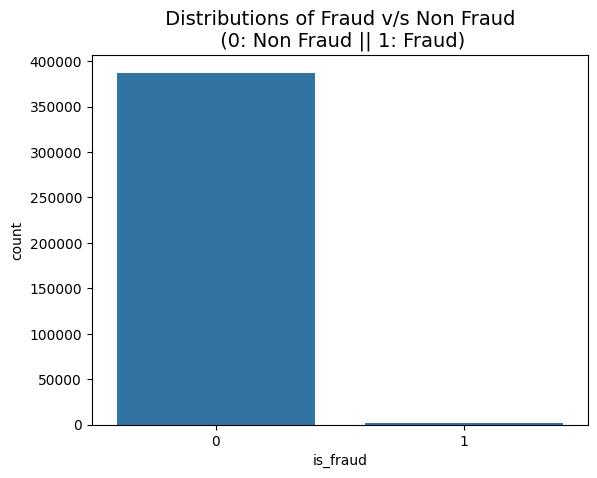

In [32]:


## Checking count of fraud and non-fraud transactions
y_train_df = y_train.to_frame()
sns.countplot(data=y_train_df, x="is_fraud")
plt.title(' Distributions of Fraud v/s Non Fraud \n (0: Non Fraud || 1: Fraud)', fontsize=14)
plt.show()


We can see that the dataset is highly imbalanced we will need to balance the dataset to avoid issues

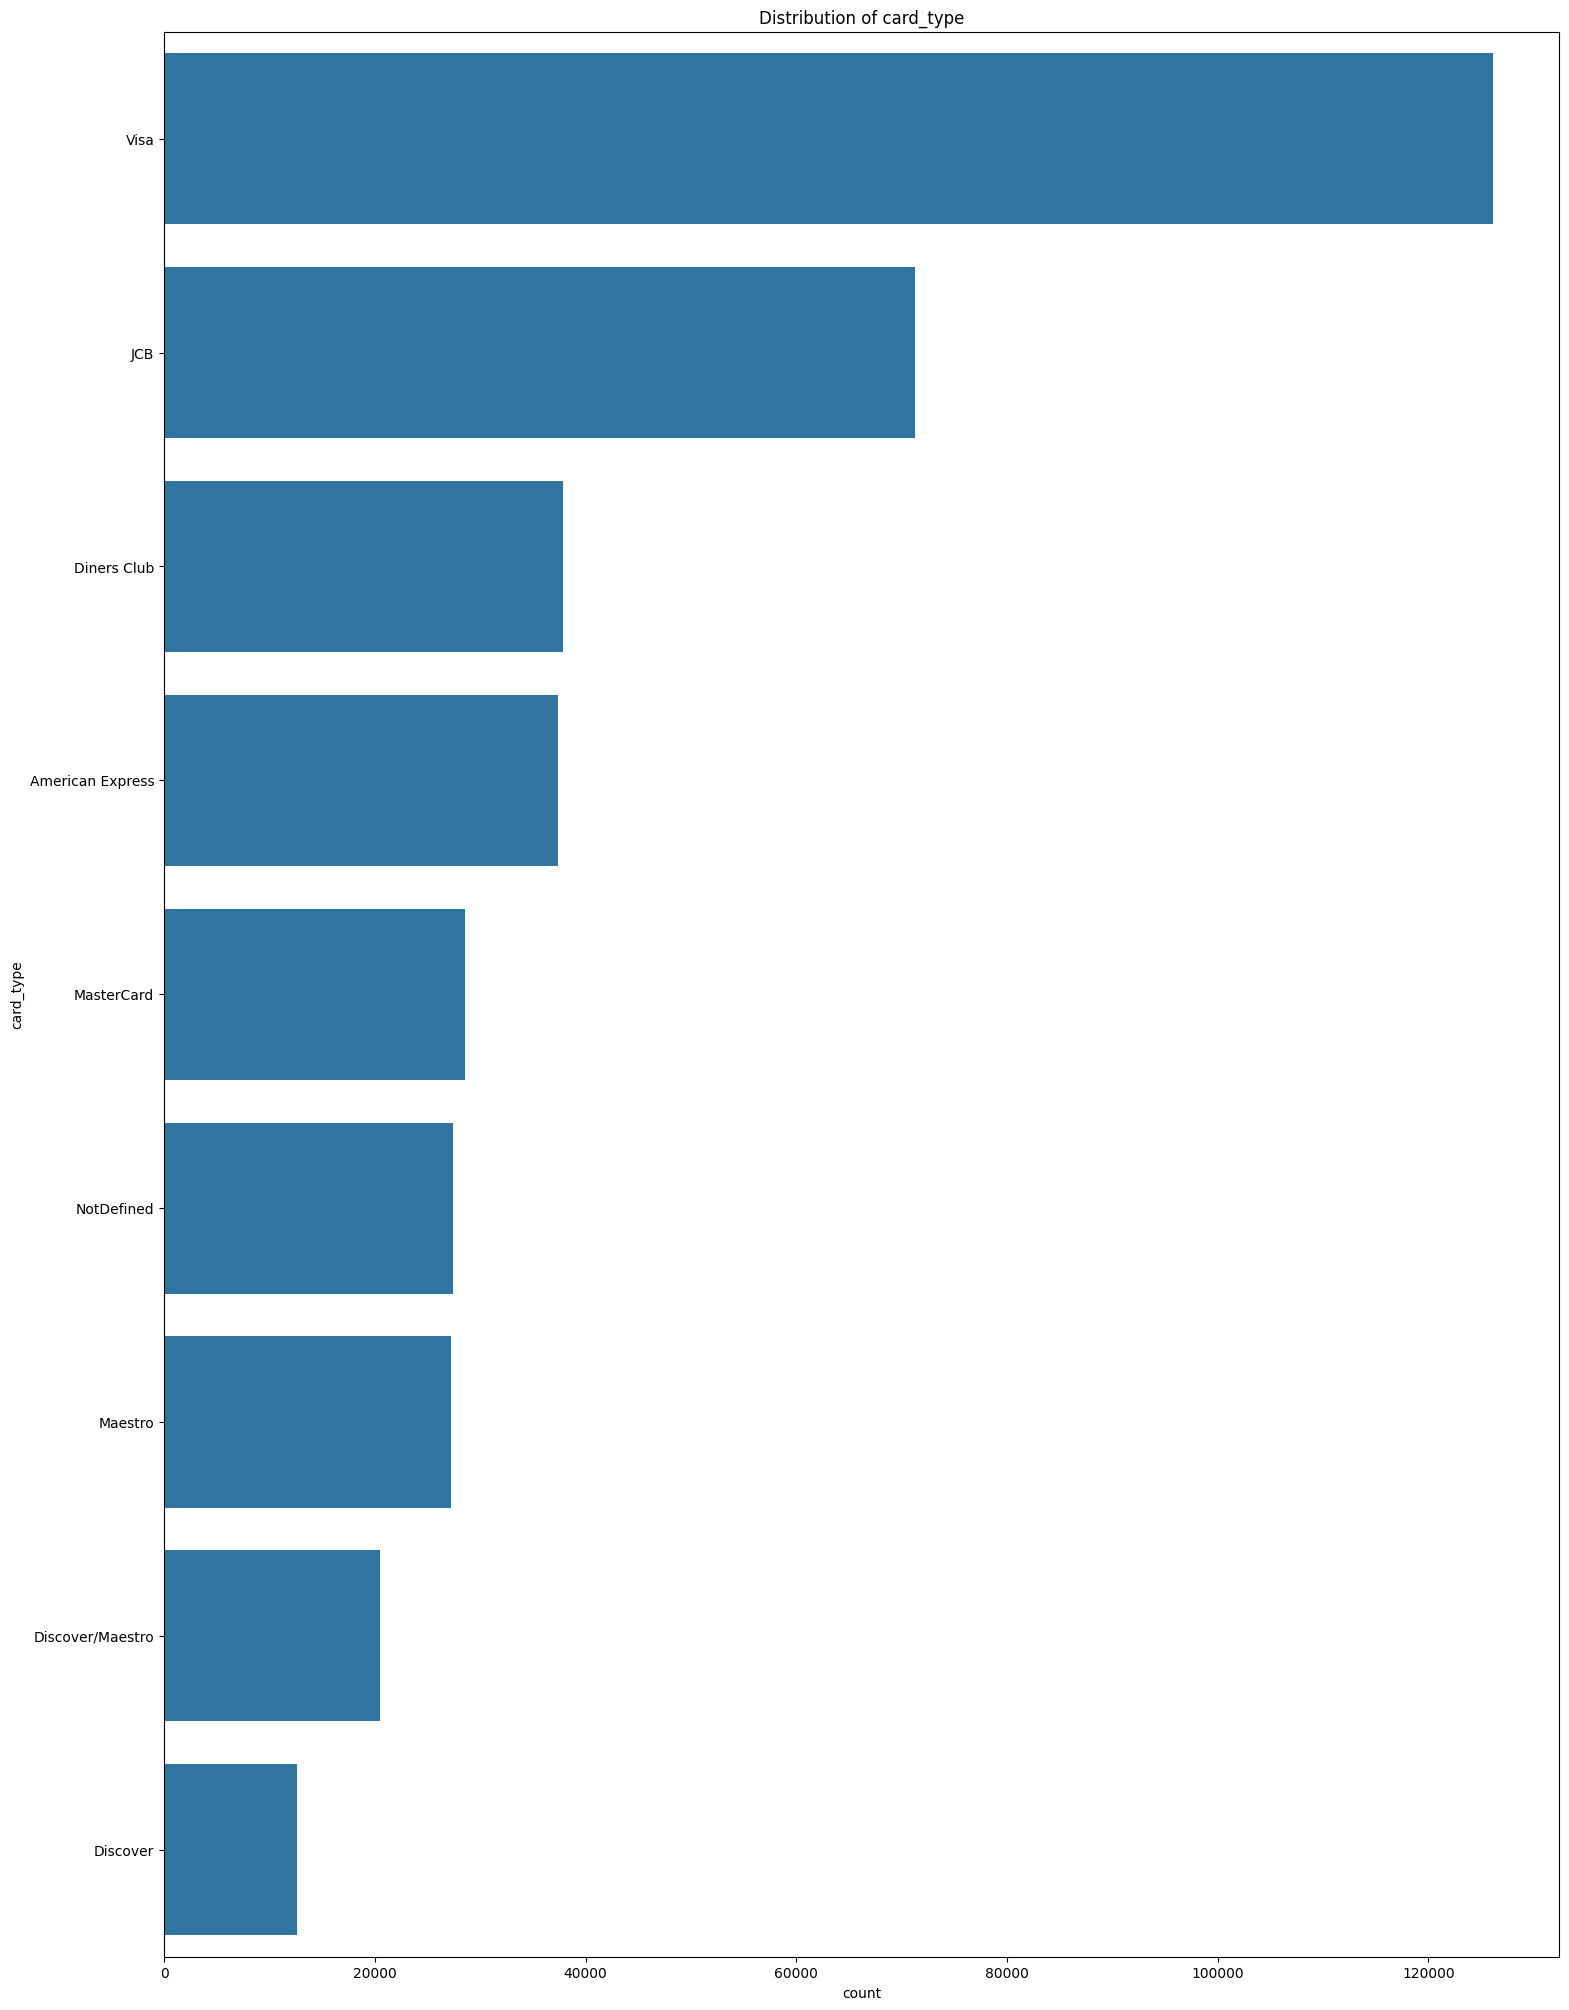

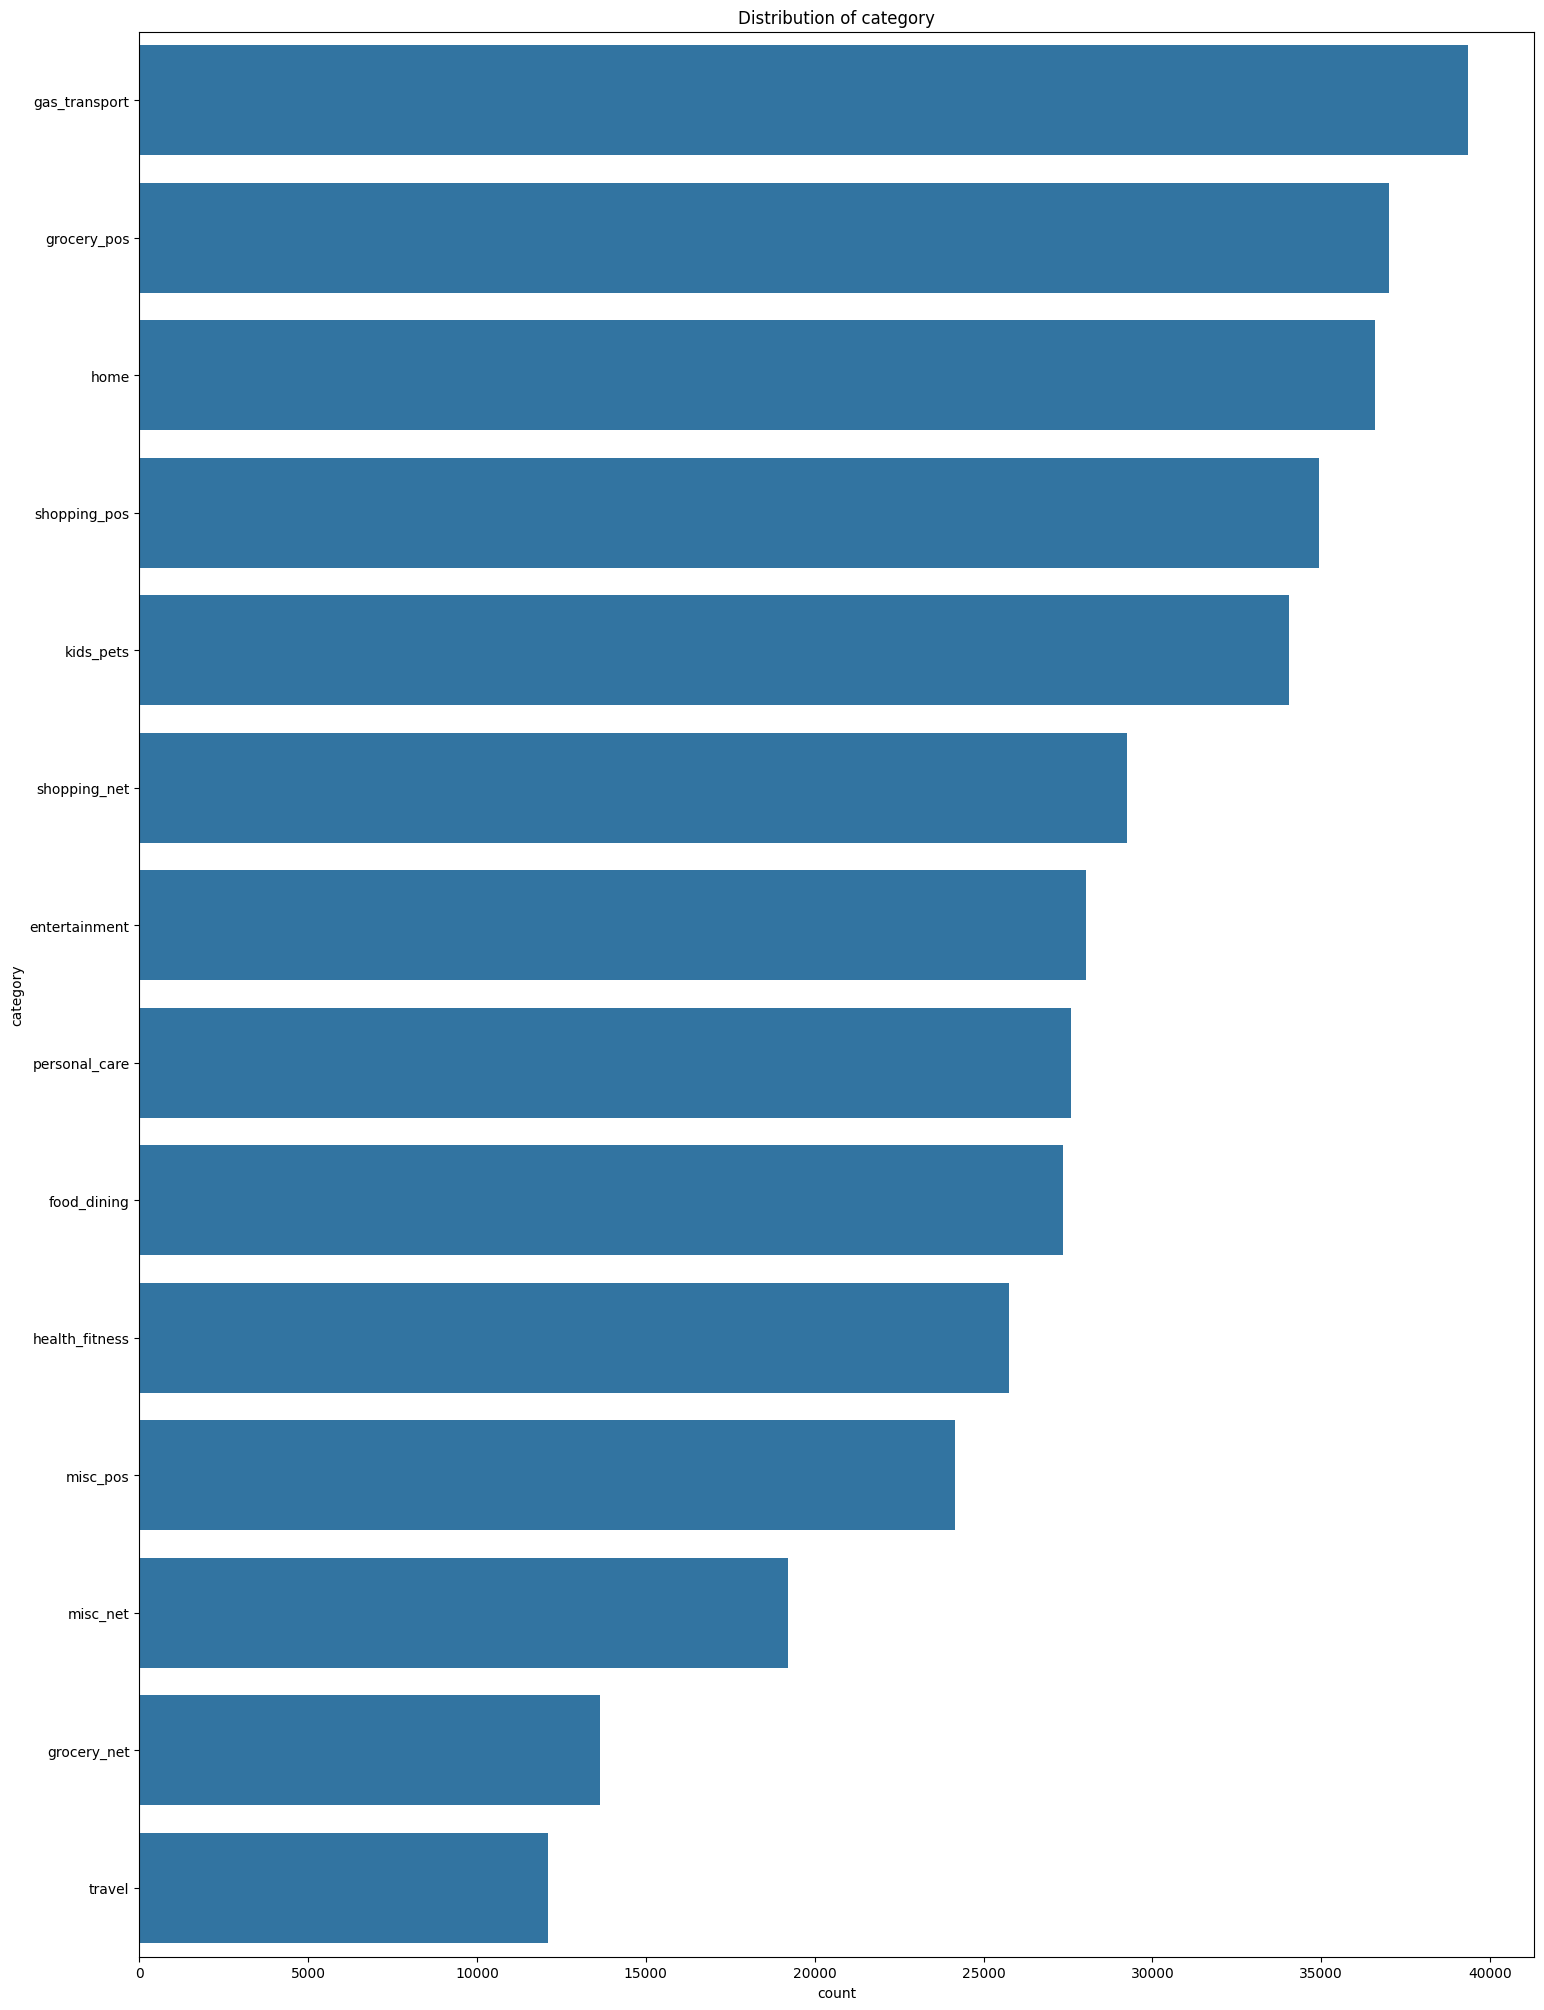

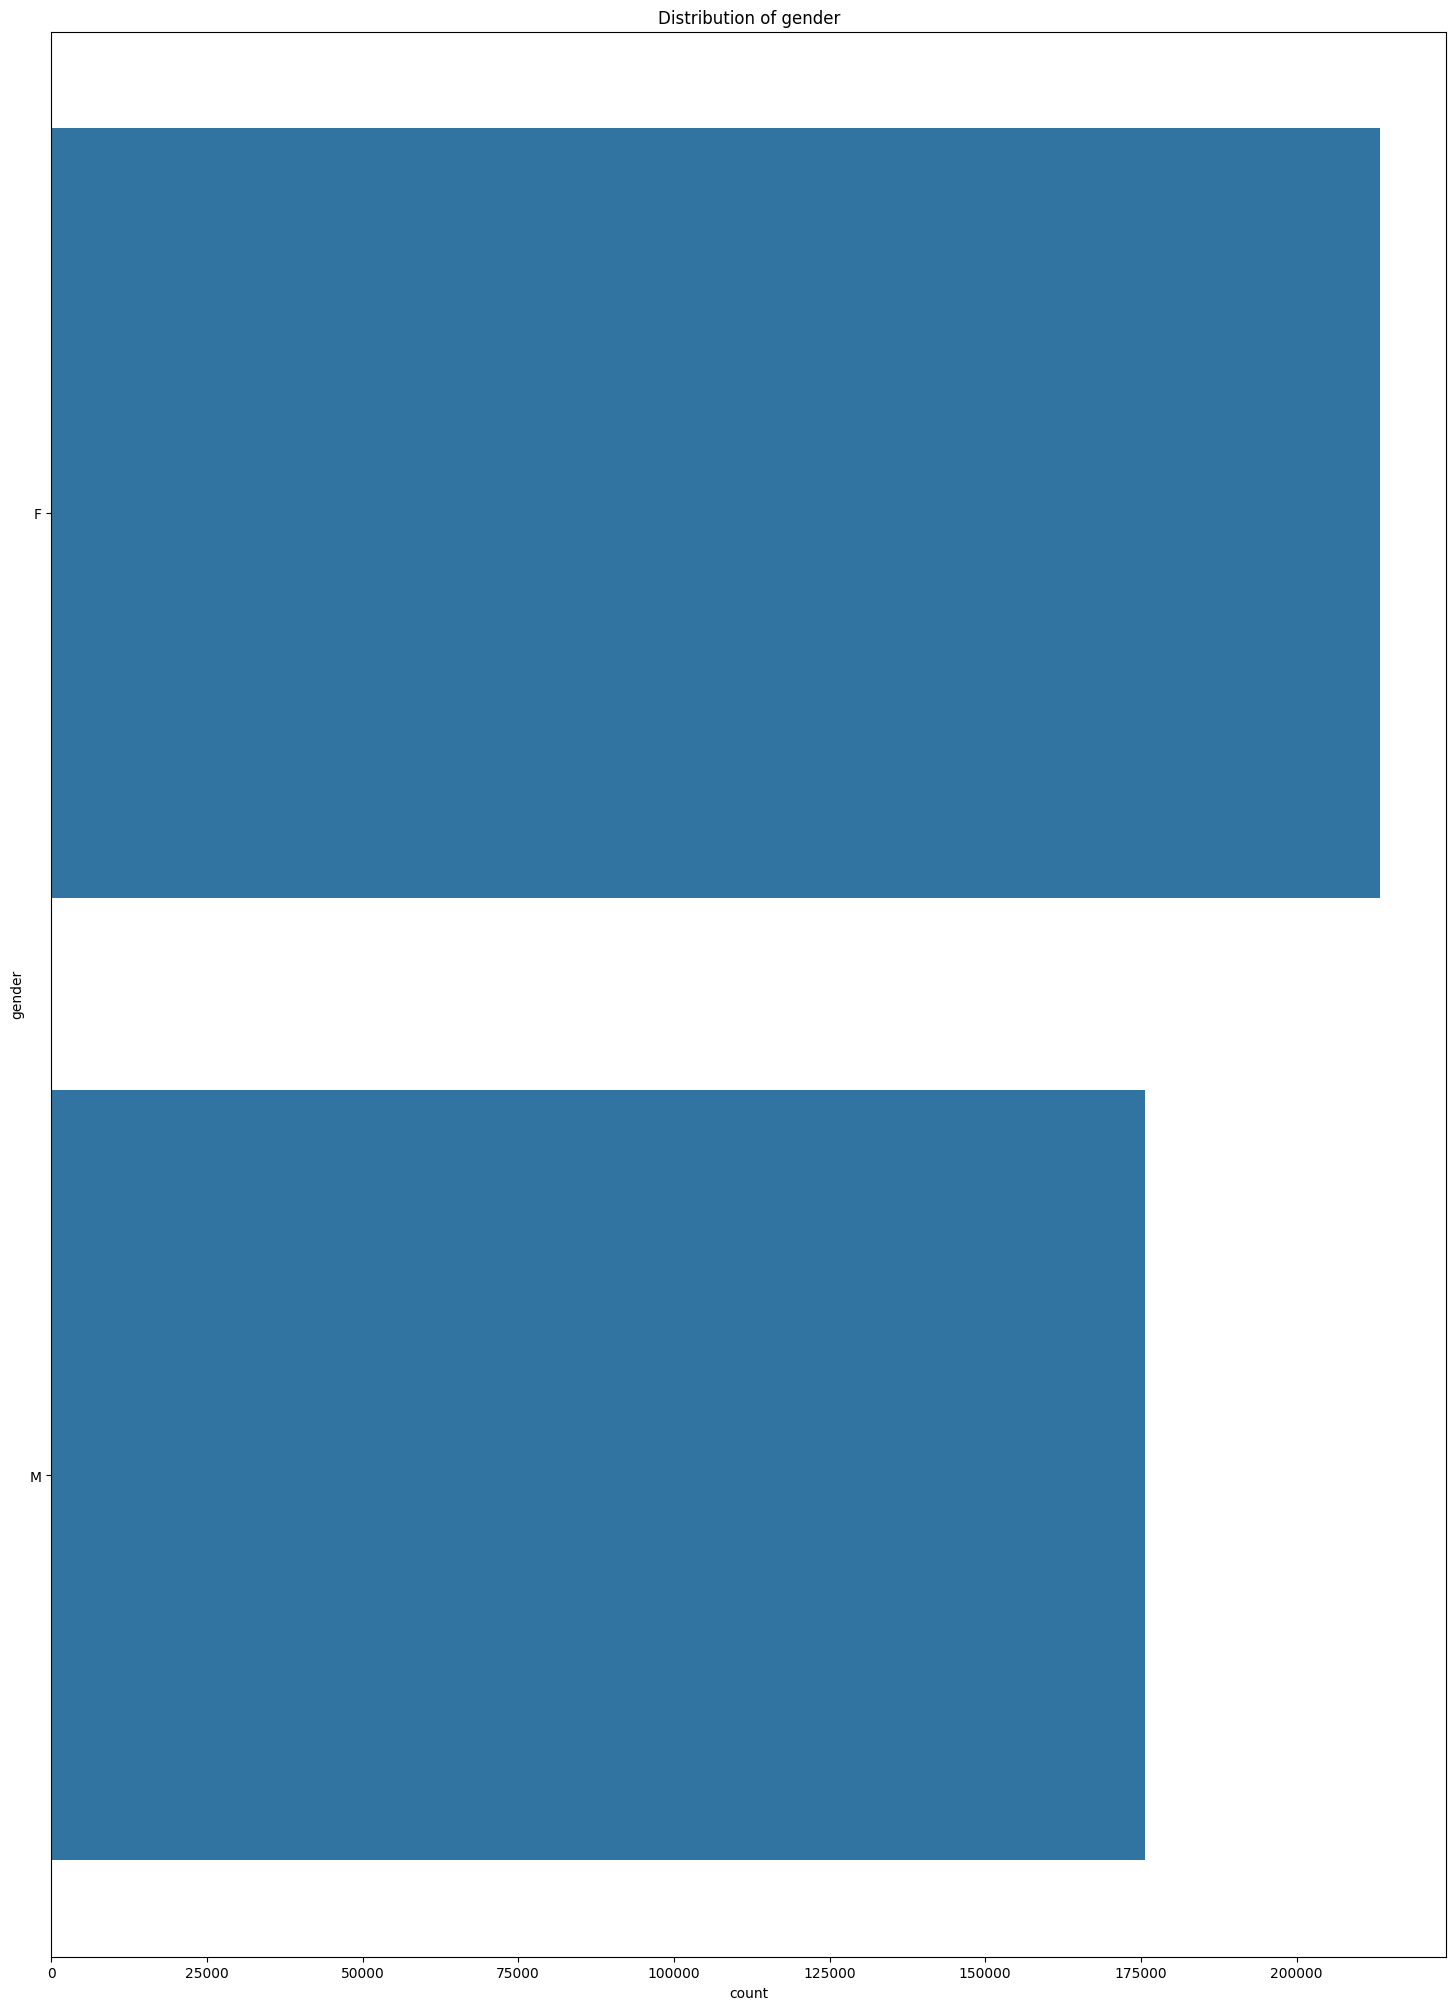

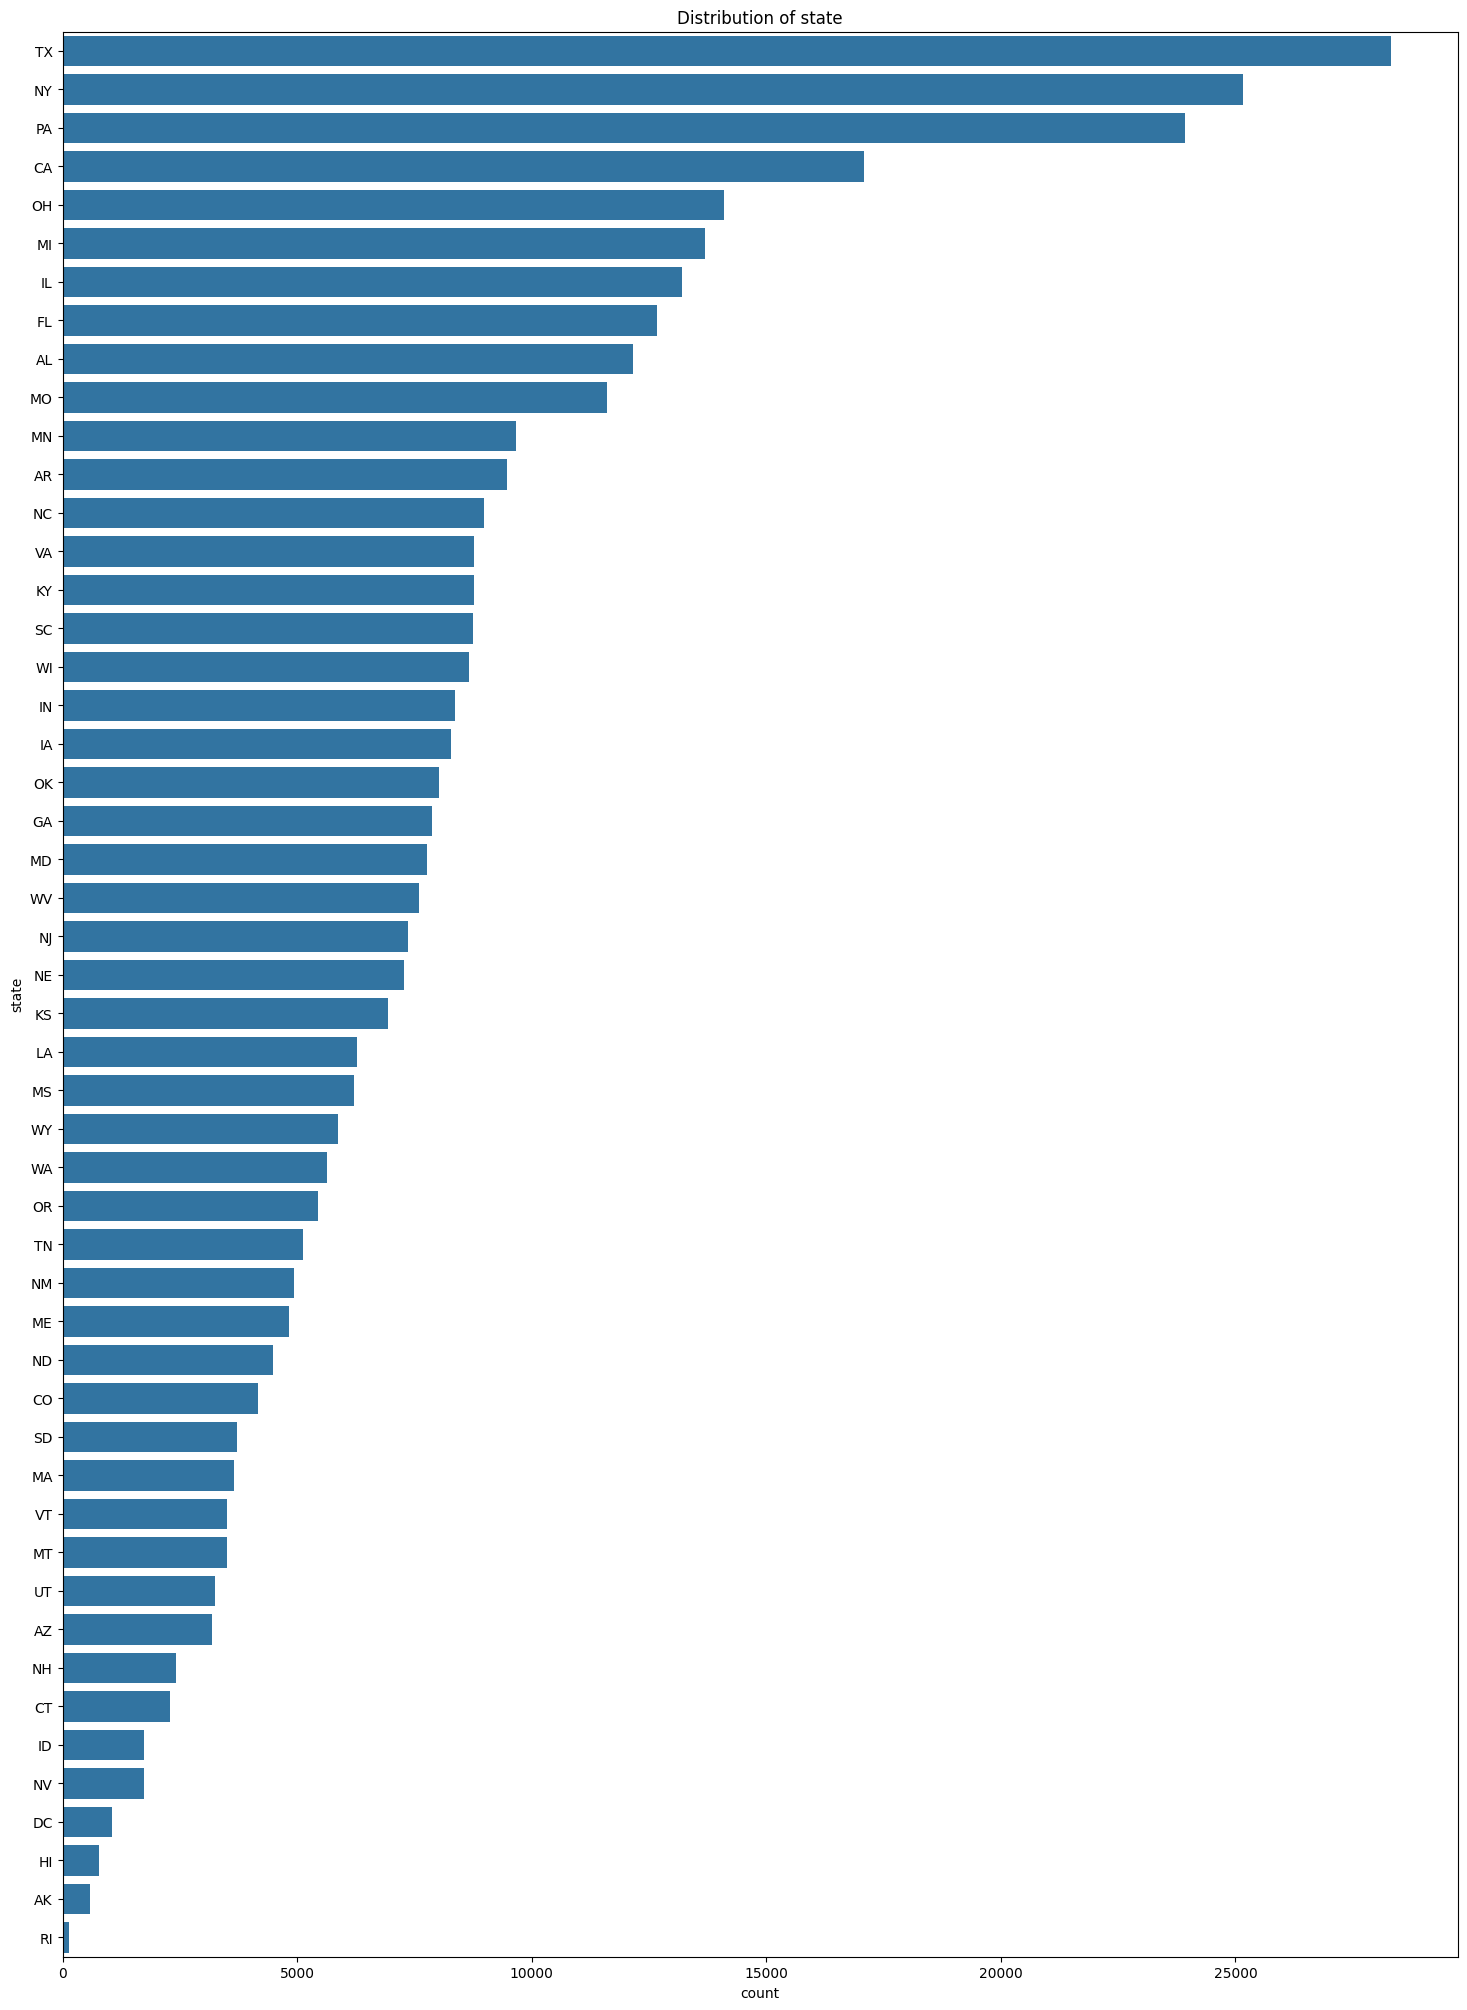

In [33]:
## Univariate analysis

#Cat Columns:

for col in ['card_type', 'category','gender','state']:
  plt.figure(figsize=(18, 25))
  if col in X_train.columns:
     sns.countplot(y=col, data=X_train, order=X_train[col].value_counts().index)
     plt.title(f"Distribution of {col}")
     plt.show()

In [34]:
## Checkmg values in job column

X_train["job"].value_counts()

,count
job,
Film/video editor,2878
Exhibition designer,2749
Naval architect,2670
"Surveyor, land/geomatics",2603
Materials engineer,2469
...,...
"Engineer, civil (consulting)",131
"Merchandiser, retail",121
Operational investment banker,8


In [35]:
# Describe population column to understand the distribution

X_train["city_pop"].describe()

,city_pop
count,3.890030e+05
mean,8.825648e+04
std,3.004161e+05
min,2.300000e+01
25%,7.410000e+02
50%,2.408000e+03
75%,1.968500e+04
max,2.906700e+06


In [36]:
# Create new column "population density" from city_pop by categorising
# population into below categories
# Low,Medium, High, Very High

bins = [0,100000,500000,1000000,3000000]
labels = ['Low', 'Medium', 'High', 'Very High']
X_train['population_density'] = pd.cut(X_train['city_pop'], bins=bins, labels=labels, right=False)
X_train.head(5)


,index,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,card_type,age_category,hour,day_of_week,speed_kmh_capped,impossible_travel_flag,suspicious_travel_flag,large_jump_flag,speed_missing,population_density
0,253062,2020-09-21 20:15:43,676372984911,"fraud_Lehner, Mosciski and King",misc_net,236.99,Vicki,Mendoza,F,3645 Atkins Island Apt. 238,...,Maestro,adult_26_40,20,Monday,16.828991,0,0,0,0,Low
1,324714,2020-10-23 13:30:03,6011975266774121,fraud_Hilpert-Conroy,kids_pets,148.55,Haley,Wagner,F,05561 Farrell Crescent,...,Discover/Maestro,senior_citizen_60_plus,13,Friday,2.388671,0,0,0,0,Low
2,18315,2020-06-27 21:11:31,4646845581490336108,fraud_Friesen Inc,shopping_pos,10.68,Julia,Bell,F,576 House Crossroad,...,Visa,adult_26_40,21,Saturday,19.351358,0,0,0,0,Low
3,281489,2020-10-04 16:55:25,2233882705243596,"fraud_Berge, Kautzer and Harris",personal_care,7.62,Jamie,Robinson,F,67089 Caitlin Meadow Apt. 905,...,MasterCard,senior_citizen_60_plus,16,Sunday,15.003527,0,0,0,0,Low
4,137407,2020-08-08 17:33:12,3566094707272327,fraud_Stiedemann Ltd,food_dining,85.09,Kristina,Stewart,F,47029 Jimmy Tunnel Apt. 106,...,JCB,middle_age_41_58,17,Saturday,17.497804,0,0,0,0,Low


In [37]:
X_train['population_density'].value_counts()

,count
population_density,
Low,335855
Medium,33486
Very High,9840
High,9822


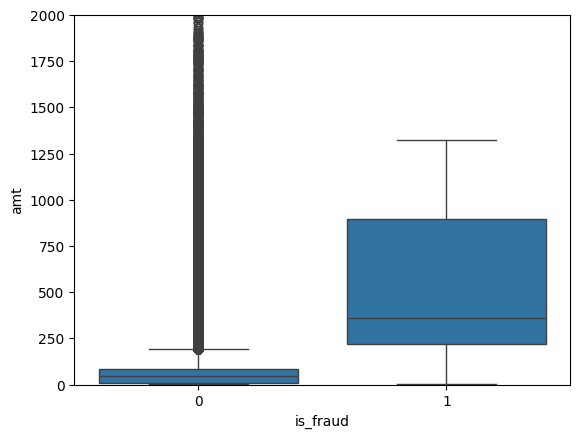

In [38]:
## Bivariate Analysis : Checking target variable against other variables

sns.boxplot(x=y_train_df['is_fraud'], y='amt', data=X_train)
plt.ylim(0,2000)
plt.show()

Clearly from above box plot it is seeen that higher the amount >250 higher the chance of getting fradulent transactions

In [39]:
# concat X_train and y_train to create a dataframe

data_train = pd.concat([X_train,y_train],axis=1)

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Maestro'),
  Text(1, 0, 'Discover/Maestro'),
  Text(2, 0, 'Visa'),
  Text(3, 0, 'MasterCard'),
  Text(4, 0, 'JCB'),
  Text(5, 0, 'NotDefined'),
  Text(6, 0, 'American Express'),
  Text(7, 0, 'Diners Club'),
  Text(8, 0, 'Discover')])

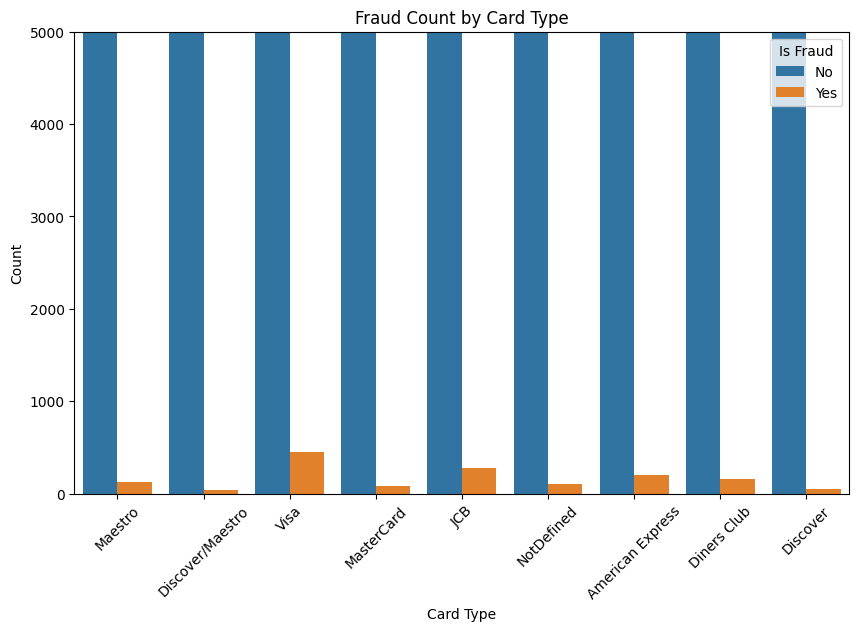

In [40]:
## Plot Grouped data into bar chart

## card Type V/S is fraud

plt.figure(figsize=(10,6))
sns.countplot(x='card_type', hue='is_fraud', data=data_train)
plt.title("Fraud Count by Card Type")
plt.xlabel("Card Type")
plt.ylabel("Count")
plt.ylim(0,5000)
plt.legend(title="Is Fraud", labels=["No", "Yes"])
plt.xticks(rotation=45) # rotate labels if many card types plt.show()

In [41]:
## Checking Fraudlenet percentage for each card type

fraud_rate = ( data_train.groupby('card_type')['is_fraud'] .mean() .reset_index() )
# Convert to percentage
fraud_rate['fraud_percentage'] = fraud_rate['is_fraud'] * 100
print(fraud_rate)

          card_type  is_fraud  fraud_percentage
0  American Express  0.005504          0.550361
1       Diners Club  0.004327          0.432661
2          Discover  0.003808          0.380801
3  Discover/Maestro  0.002195          0.219512
4               JCB  0.003875          0.387515
5           Maestro  0.004514          0.451409
6        MasterCard  0.003081          0.308059
7        NotDefined  0.003644          0.364445
8              Visa  0.003577          0.357690


We can see fractionally but the American express card type has the highest fraudlent transactions

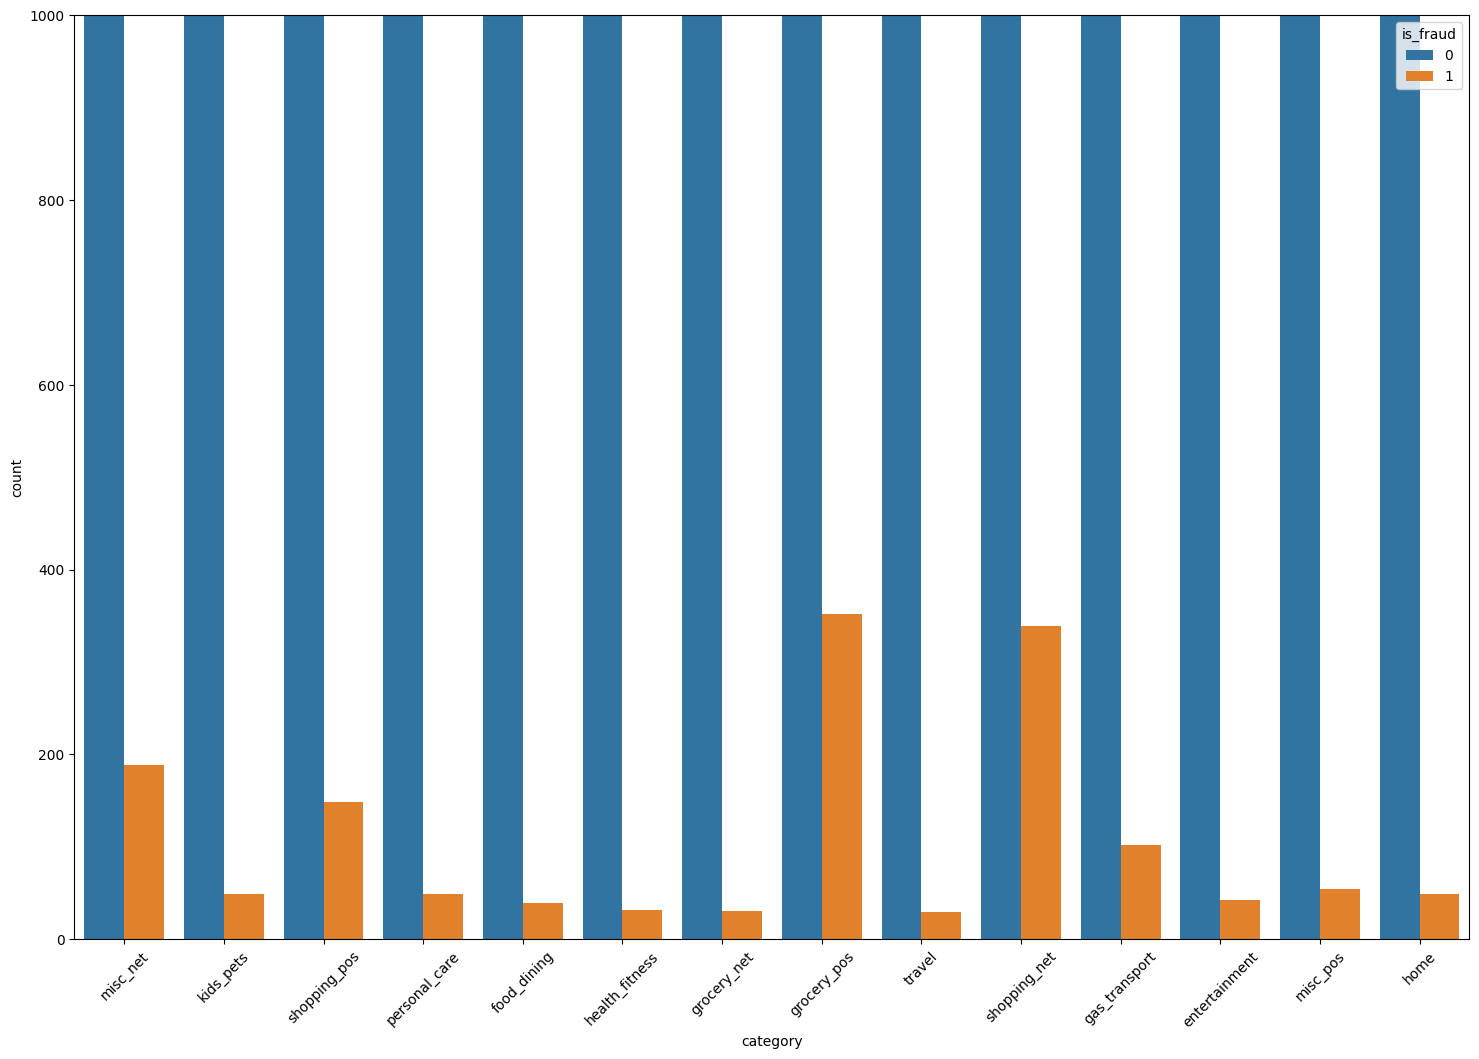

In [42]:
## Merchant Category V/S Is_Fraud

plt.figure(figsize=(18,12))
sns.countplot(x='category', hue='is_fraud', data=data_train)
plt.ylim(0,1000)
plt.xticks(rotation=45)
plt.show()

In [43]:
fraud_rate_per_category = ( data_train.groupby('category')['is_fraud'] .mean() .reset_index() )
# Convert to percentage
fraud_rate_per_category['fraud_percentage'] = fraud_rate_per_category['is_fraud'] * 100
print(fraud_rate_per_category)

          category  is_fraud  fraud_percentage
0    entertainment  0.001499          0.149855
1      food_dining  0.001426          0.142612
2    gas_transport  0.002593          0.259285
3      grocery_net  0.002197          0.219684
4      grocery_pos  0.009515          0.951454
5   health_fitness  0.001204          0.120412
6             home  0.001339          0.133942
7        kids_pets  0.001439          0.143893
8         misc_net  0.009787          0.978708
9         misc_pos  0.002235          0.223482
10   personal_care  0.001775          0.177530
11    shopping_net  0.011590          1.158974
12    shopping_pos  0.004235          0.423511
13          travel  0.002399          0.239907


Misc_net,shopping_net and grocry_pos are categories which have highest fraudelent transactions compared to other categories

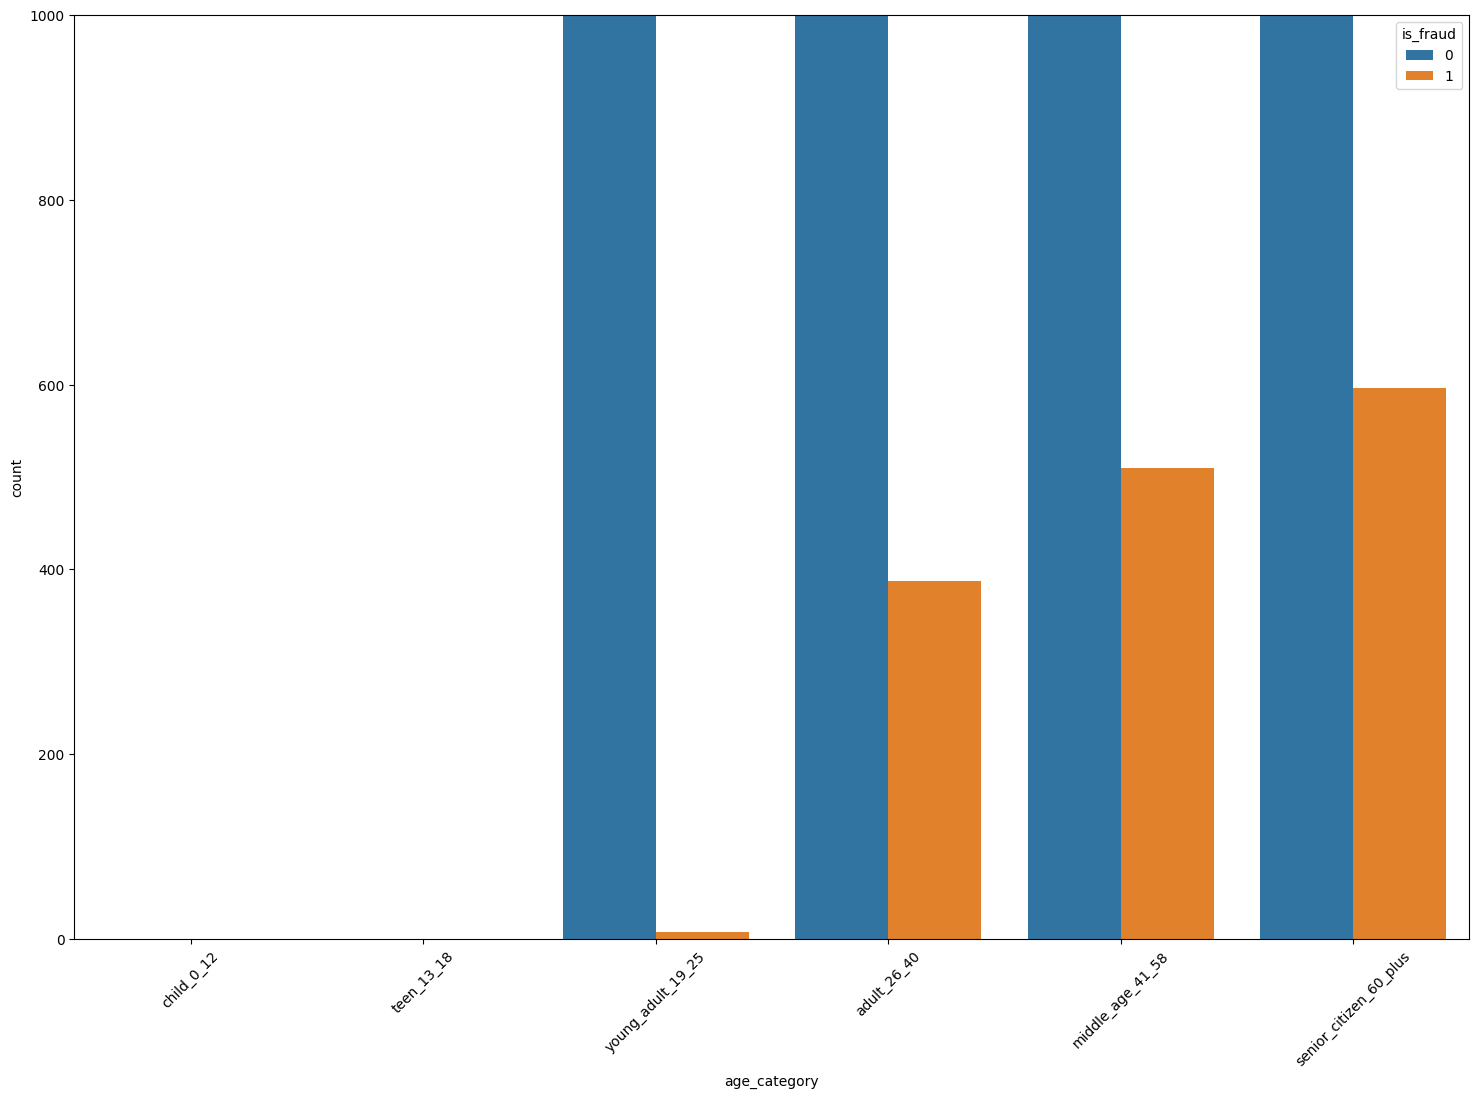

In [44]:
plt.figure(figsize=(18,12))
sns.countplot(x='age_category', hue='is_fraud', data=data_train)
plt.ylim(0,1000)
plt.xticks(rotation=45)
plt.show()


In [45]:
fraud_rate_per_age_category = ( data_train.groupby('age_category')['is_fraud'] .mean() .reset_index() )
# Convert to percentage
fraud_rate_per_age_category['fraud_percentage'] = fraud_rate_per_age_category['is_fraud'] * 100
print(fraud_rate_per_age_category)

             age_category  is_fraud  fraud_percentage
0              child_0_12       NaN               NaN
1              teen_13_18       NaN               NaN
2       young_adult_19_25  0.001303          0.130272
3             adult_26_40  0.003729          0.372868
4        middle_age_41_58  0.003356          0.335586
5  senior_citizen_60_plus  0.004689          0.468926


We could see that the fraud transactions are more in senior citizen category

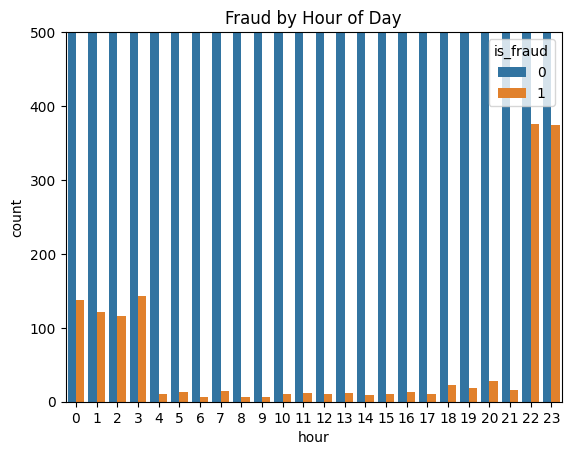

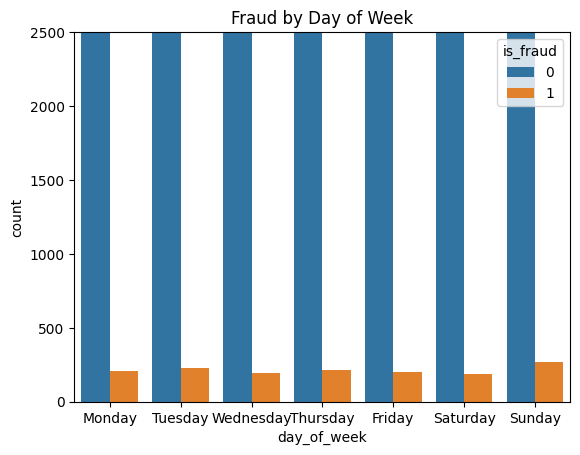

In [46]:
## Lets check fraud v/s timestamp

# Fraud by hour
sns.countplot(x='hour', hue='is_fraud', data=data_train)
plt.title("Fraud by Hour of Day")
plt.ylim(0,500)
plt.show()
# Fraud by day of week
sns.countplot(x='day_of_week', hue='is_fraud', data=data_train, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title("Fraud by Day of Week")
plt.ylim(0,2500)
plt.show()

Clearly we could see that the fraudulent transactions are

*   occuring late night or post midnight
*   there is no indication on day of week as the fraudlent transactiosn seems to be distributed similarly across all days

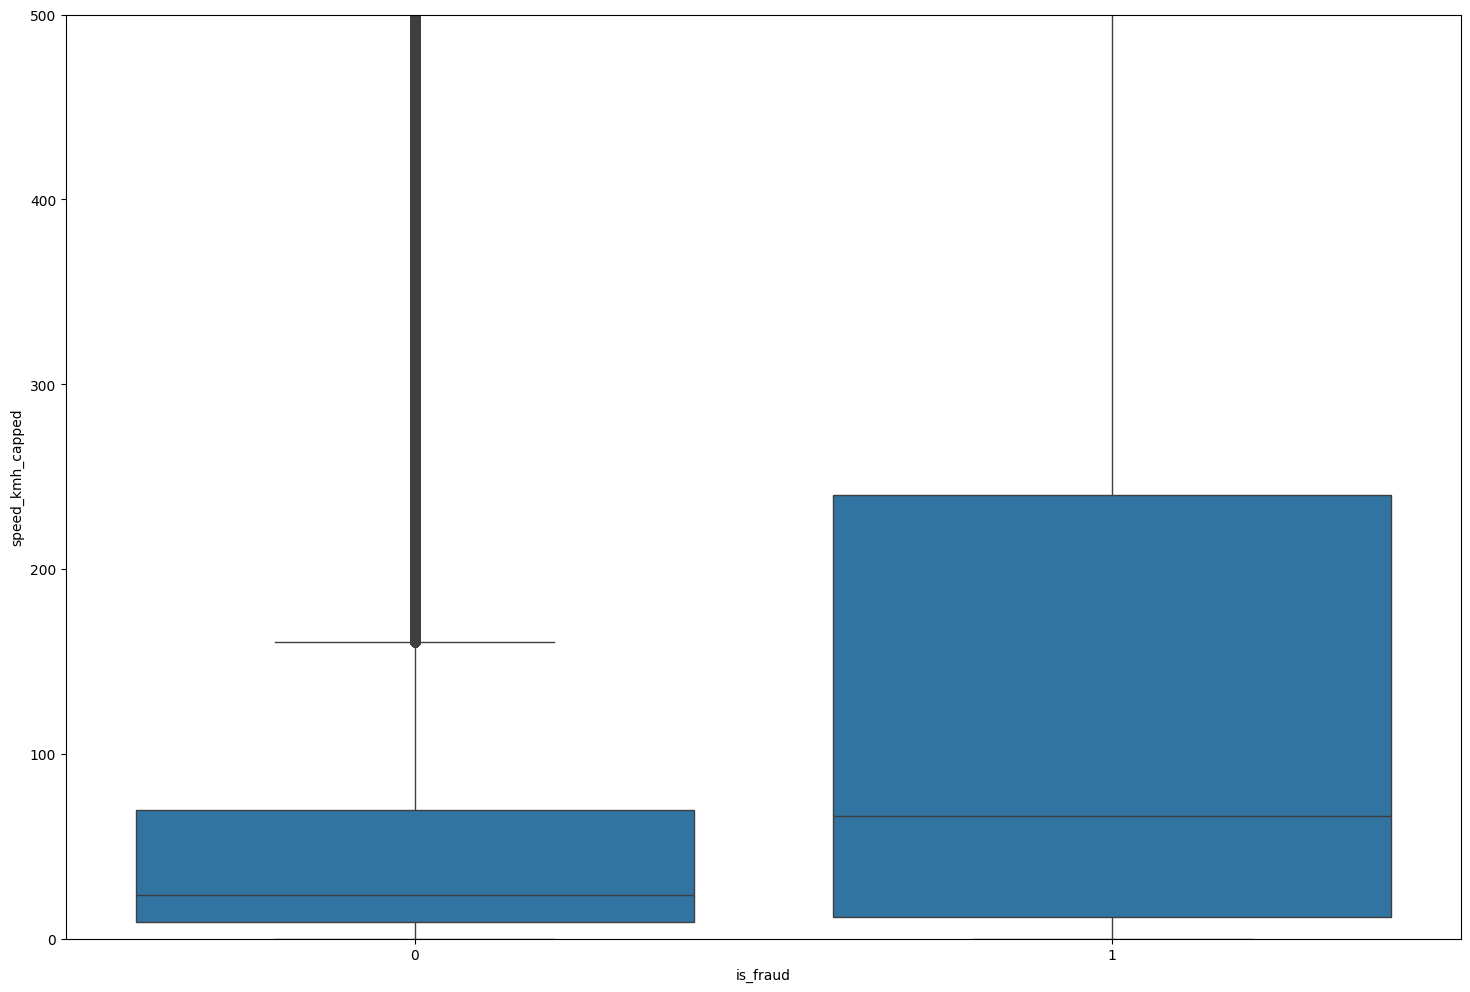

In [47]:
## Analyse Velcoity of transaction v/s fraud

plt.figure(figsize=(18,12))
sns.boxplot(x='is_fraud', y='speed_kmh_capped', data=data_train)
plt.ylim(0,500)
plt.show()

Above box plot clearly demonstrates that the fraudelent transactions are having more speed_kmh that is the velocity of transaction

The non fraudulent transactions have its 75% of transaction with velocity under 100 while 75% of fraudlenet transactions are having velocity of upward 200

## Data Scaling, Balancing and Preprocessing

In [49]:
# Fixed encoding pipeline: robust OHE, K-fold target encoding, frequency encoding,
# numeric coercion, imputation and scaling with safe test handling, and artifact saving.

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import KFold
from sklearn.impute import SimpleImputer
import joblib

# --- Preconditions: X_train, X_test, y_train must exist ---
try:
    X_train
    X_test
    y_train
except NameError:
    raise RuntimeError("Please ensure X_train, X_test, and y_train are defined before running this cell.")

# Work on copies
Xtr = X_train.copy()
Xte = X_test.copy()
ytr = y_train.copy()

# --- Detect categorical and numeric candidate columns ---
cat_cols = [c for c in Xtr.columns if Xtr[c].dtype == 'object' or str(Xtr[c].dtype).startswith('category')]
all_cols = list(Xtr.columns)
num_candidate_cols = [c for c in all_cols if c not in cat_cols]

# Cardinality thresholds
LOW_CARD_MAX = 20
MED_CARD_MAX = 200

low_card_cols, med_card_cols, high_card_cols = [], [], []
for c in cat_cols:
    n = Xtr[c].nunique(dropna=False)
    if n <= LOW_CARD_MAX:
        low_card_cols.append(c)
    elif n <= MED_CARD_MAX:
        med_card_cols.append(c)
    else:
        high_card_cols.append(c)

print(f"Detected categorical columns: {len(cat_cols)} total")
print(f"  Low-card (OneHot)    : {low_card_cols}")
print(f"  Medium-card (Target) : {med_card_cols}")
print(f"  High-card (Freq)     : {high_card_cols}")

# --- Robust OneHotEncoder for low-cardinality columns ---
ohe = None
ohe_cols = low_card_cols

if ohe_cols:
    # Convert to str and fill sentinel
    Xtr_ohe = Xtr[ohe_cols].astype(str).fillna("##MISSING##")
    Xte_ohe = Xte[ohe_cols].astype(str).fillna("##MISSING##")

    ohe = OneHotEncoder(handle_unknown='ignore')
    ohe.fit(Xtr_ohe)                       # fit on train only

    tr_arr = ohe.transform(Xtr_ohe)
    te_arr = ohe.transform(Xte_ohe)

    # Ensure dense arrays
    if hasattr(tr_arr, "toarray"):
        tr_arr = tr_arr.toarray()
    if hasattr(te_arr, "toarray"):
        te_arr = te_arr.toarray()

    # Derive column names defensively
    try:
        col_names = list(ohe.get_feature_names_out(ohe_cols))
    except Exception:
        col_names = []
        for i, col in enumerate(ohe_cols):
            cats = ohe.categories_[i]
            col_names.extend([f"{col}__{str(cat)}" for cat in cats])

    # If mismatch, fallback to generic names
    if tr_arr.shape[1] != len(col_names):
        col_names = [f"ohe_{i}" for i in range(tr_arr.shape[1])]

    print("OHE shapes:", tr_arr.shape, te_arr.shape, "num col names:", len(col_names))

    ohe_tr = pd.DataFrame(tr_arr, index=Xtr.index, columns=col_names)
    ohe_te = pd.DataFrame(te_arr, index=Xte.index, columns=col_names)
else:
    ohe_tr = pd.DataFrame(index=Xtr.index)
    ohe_te = pd.DataFrame(index=Xte.index)

# --- K-fold target encoding for medium-cardinality columns ---
def kfold_target_encode(train_df, col, target, n_splits=5, smoothing=10.0, random_state=42):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    oof = pd.Series(index=train_df.index, dtype=float)
    global_mean = train_df[target].mean()
    for tr_idx, val_idx in kf.split(train_df):
        tr = train_df.iloc[tr_idx]
        val = train_df.iloc[val_idx]
        stats = tr.groupby(col)[target].agg(['mean', 'count'])
        smooth = (stats['mean'] * stats['count'] + global_mean * smoothing) / (stats['count'] + smoothing)
        oof.iloc[val_idx] = val[col].map(smooth).fillna(global_mean)
    full_stats = train_df.groupby(col)[target].agg(['mean', 'count'])
    mapping = (full_stats['mean'] * full_stats['count'] + global_mean * smoothing) / (full_stats['count'] + smoothing)
    mapping = mapping.rename('te_map')
    return oof, mapping, global_mean

te_oof_dfs, te_maps, te_globals = {}, {}, {}
for c in med_card_cols:
    train_concat = pd.concat([Xtr[[c]], ytr], axis=1)
    target_name = ytr.name if hasattr(ytr, 'name') and ytr.name is not None else train_concat.columns[-1]
    oof, mapping, gmean = kfold_target_encode(train_concat, col=c, target=target_name, n_splits=5, smoothing=10.0)
    te_oof_dfs[c] = oof
    te_maps[c] = mapping
    te_globals[c] = gmean

if med_card_cols:
    te_tr = pd.DataFrame({c + "_te": te_oof_dfs[c] for c in med_card_cols}, index=Xtr.index)
    te_te = pd.DataFrame(index=Xte.index)
    for c in med_card_cols:
        te_te[c + "_te"] = Xte[c].astype(str).map(te_maps[c]).fillna(te_globals[c])
else:
    te_tr = pd.DataFrame(index=Xtr.index)
    te_te = pd.DataFrame(index=Xte.index)

# --- Frequency encoding for high-cardinality columns ---
freq_maps = {}
freq_tr = pd.DataFrame(index=Xtr.index)
freq_te = pd.DataFrame(index=Xte.index)

for c in high_card_cols:
    freq = Xtr[c].astype(str).fillna("##MISSING##").value_counts(normalize=True)
    freq_maps[c] = freq
    freq_tr[c + "_freq"] = Xtr[c].astype(str).fillna("##MISSING##").map(freq).fillna(0.0)
    freq_te[c + "_freq"] = Xte[c].astype(str).fillna("##MISSING##").map(freq).fillna(0.0)

# --- Robust numeric preprocessing: coerce, impute, scale, safe test handling ---
# 1) Start with numeric columns present in train (exclude object/datetime)
numeric_only_cols = Xtr.select_dtypes(include=[np.number]).columns.tolist()

# 2) Convert datetime columns to numeric features (epoch, hour, dow) if present
datetime_cols = Xtr.select_dtypes(include=['datetime64[ns]', 'datetime64[ns, UTC]']).columns.tolist()
for dtc in datetime_cols:
    Xtr[f'{dtc}_epoch'] = Xtr[dtc].astype('int64') // 10**9
    Xte[f'{dtc}_epoch'] = Xte[dtc].astype('int64') // 10**9
    Xtr[f'{dtc}_hour'] = Xtr[dtc].dt.hour
    Xte[f'{dtc}_hour'] = Xte[dtc].dt.hour
    Xtr[f'{dtc}_dow'] = Xtr[dtc].dt.dayofweek
    Xte[f'{dtc}_dow'] = Xte[dtc].dt.dayofweek

# Add newly created datetime-derived numeric cols
for dtc in datetime_cols:
    for newc in (f'{dtc}_epoch', f'{dtc}_hour', f'{dtc}_dow'):
        if newc in Xtr.columns and newc not in numeric_only_cols:
            numeric_only_cols.append(newc)

# 3) Coerce candidate numeric-like columns (from earlier detection) to numeric if possible
#    This helps if some numeric columns were object dtype.
for c in list(num_candidate_cols):
    if c not in numeric_only_cols:
        # try coercion on train; if many numeric values, include it
        coerced = pd.to_numeric(Xtr[c], errors='coerce')
        if coerced.notna().sum() > 0:
            Xtr[c] = coerced
            Xte[c] = pd.to_numeric(Xte[c], errors='coerce')
            numeric_only_cols.append(c)

# 4) Finalize numeric columns: keep those with at least one non-null in train
valid_numeric_cols = [c for c in numeric_only_cols if Xtr[c].notna().any()]

imputer = SimpleImputer(strategy='median')
scaler = StandardScaler()

if len(valid_numeric_cols) == 0:
    Xtr_num_scaled = pd.DataFrame(index=Xtr.index)
    Xte_num_scaled = pd.DataFrame(index=Xte.index)
else:
    # Ensure test has same columns (add missing numeric columns in test as NaN)
    for c in valid_numeric_cols:
        if c not in Xte.columns:
            Xte[c] = np.nan

    # Coerce both train and test valid numeric cols to numeric (defensive)
    Xtr[valid_numeric_cols] = Xtr[valid_numeric_cols].apply(pd.to_numeric, errors='coerce')
    Xte[valid_numeric_cols] = Xte[valid_numeric_cols].apply(pd.to_numeric, errors='coerce')

    # Fit imputer on train numeric slice
    Xtr_num = pd.DataFrame(imputer.fit_transform(Xtr[valid_numeric_cols]),
                           columns=valid_numeric_cols, index=Xtr.index)

    # Fit scaler on imputed train numeric slice
    scaler.fit(Xtr_num)
    Xtr_num_scaled = pd.DataFrame(scaler.transform(Xtr_num),
                                  columns=valid_numeric_cols, index=Xtr.index)

    # Apply imputer and scaler to test numeric slice (safe because test has same columns)
    Xte_num = pd.DataFrame(imputer.transform(Xte[valid_numeric_cols]),
                           columns=valid_numeric_cols, index=Xte.index)
    Xte_num_scaled = pd.DataFrame(scaler.transform(Xte_num),
                                  columns=valid_numeric_cols, index=Xte.index)

# --- Assemble final transformed DataFrames (train and test) ---
Xtr_final = Xtr_num_scaled.copy()
Xte_final = Xte_num_scaled.copy()

# Add one-hot columns
Xtr_final = pd.concat([Xtr_final, ohe_tr], axis=1)
Xte_final = pd.concat([Xte_final, ohe_te], axis=1)

# Add target-encoded columns
Xtr_final = pd.concat([Xtr_final, te_tr], axis=1)
Xte_final = pd.concat([Xte_final, te_te], axis=1)

# Add frequency-encoded columns
Xtr_final = pd.concat([Xtr_final, freq_tr], axis=1)
Xte_final = pd.concat([Xte_final, freq_te], axis=1)

# Ensure same column order and fill any missing columns in test with zeros
for col in Xtr_final.columns:
    if col not in Xte_final.columns:
        Xte_final[col] = 0.0
for col in Xte_final.columns:
    if col not in Xtr_final.columns:
        Xtr_final[col] = 0.0

# Reorder columns identically
Xtr_final = Xtr_final.reindex(sorted(Xtr_final.columns), axis=1)
Xte_final = Xte_final.reindex(sorted(Xtr_final.columns), axis=1)

print("Transformed shapes:", Xtr_final.shape, Xte_final.shape)

# --- Save encoder artifacts for production ---
artifacts = {
    'onehot_encoder': ohe,
    'onehot_columns': ohe_cols,
    'target_maps': te_maps,
    'target_globals': te_globals,
    'freq_maps': freq_maps,
    'num_imputer': imputer,
    'scaler': scaler,
    'num_cols': valid_numeric_cols,
    'final_columns': list(Xtr_final.columns)
}
joblib.dump(artifacts, "encoding_artifacts.joblib")
print("Saved encoding artifacts to encoding_artifacts.joblib")

# Final outputs
display(Xtr_final.head())
display(Xte_final.head())


Detected categorical columns: 13 total
  Low-card (OneHot)    : ['category', 'gender', 'card_type', 'age_category', 'day_of_week', 'population_density']
  Medium-card (Target) : ['state']
  High-card (Freq)     : ['merchant', 'first', 'last', 'street', 'city', 'job']
OHE shapes: (389003, 40) (166716, 40) num col names: 40
Transformed shapes: (389003, 66) (166716, 66)
Saved encoding artifacts to encoding_artifacts.joblib


,age_category_adult_26_40,age_category_middle_age_41_58,age_category_senior_citizen_60_plus,age_category_young_adult_19_25,amt,card_type_American Express,card_type_Diners Club,card_type_Discover,card_type_Discover/Maestro,card_type_JCB,...,speed_kmh_capped,speed_missing,state_te,street_freq,suspicious_travel_flag,trans_date_trans_time,trans_date_trans_time_dow,trans_date_trans_time_epoch,trans_date_trans_time_hour,zip
0,1.0,0.0,0.0,0.0,1.085084,0.0,0.0,0.0,0.0,0.0,...,-0.315289,-0.042184,0.003811,0.001864,-0.278976,-0.169230,-1.251316,-0.169230,1.056535,0.672220
1,0.0,0.0,1.0,0.0,0.512612,0.0,0.0,0.0,1.0,0.0,...,-0.367148,-0.042184,0.002902,0.000422,-0.278976,0.357720,0.584954,0.357720,0.029253,-1.023110
2,1.0,0.0,0.0,0.0,-0.379819,0.0,0.0,0.0,0.0,0.0,...,-0.306231,-0.042184,0.005093,0.001910,-0.278976,-1.597344,1.044021,-1.597344,1.203290,-1.380859
3,0.0,0.0,1.0,0.0,-0.399626,0.0,0.0,0.0,0.0,0.0,...,-0.321845,-0.042184,0.006441,0.001123,-0.278976,0.044434,1.503089,0.044434,0.469517,-0.339408
4,0.0,1.0,0.0,0.0,0.101836,0.0,0.0,0.0,0.0,1.0,...,-0.312887,-0.042184,0.002571,0.002473,-0.278976,-0.902097,1.044021,-0.902097,0.616272,1.579901


,age_category_adult_26_40,age_category_middle_age_41_58,age_category_senior_citizen_60_plus,age_category_young_adult_19_25,amt,card_type_American Express,card_type_Diners Club,card_type_Discover,card_type_Discover/Maestro,card_type_JCB,...,speed_kmh_capped,speed_missing,state_te,street_freq,suspicious_travel_flag,trans_date_trans_time,trans_date_trans_time_dow,trans_date_trans_time_epoch,trans_date_trans_time_hour,zip
0,0.0,1.0,0.0,0.0,0.414546,0.0,0.0,0.0,0.0,0.0,...,-0.277418,-0.042184,0.003653,0.001134,-0.278976,-1.457480,-1.251316,-1.457480,-0.851274,-0.732563
1,0.0,0.0,1.0,0.0,-0.390111,0.0,0.0,0.0,0.0,0.0,...,-0.298347,-0.042184,0.005591,0.001221,-0.278976,-1.547054,-0.792249,-1.547054,1.203290,-0.674967
2,1.0,0.0,0.0,0.0,-0.095202,1.0,0.0,0.0,0.0,0.0,...,-0.076502,-0.042184,0.005479,0.002524,-0.278976,-0.069498,1.503089,-0.069498,1.056535,0.289751
3,1.0,0.0,0.0,0.0,0.099247,0.0,0.0,1.0,0.0,0.0,...,0.502056,-0.042184,0.002884,0.002630,-0.278976,-1.087607,-0.792249,-1.087607,0.029253,-1.220097
4,0.0,1.0,0.0,0.0,5.061119,0.0,0.0,0.0,0.0,0.0,...,-0.210650,-0.042184,0.002825,0.001967,-0.278976,-1.003930,1.503089,-1.003930,0.176008,1.032798


In [50]:
## Now balancing the data

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(Xtr_final,y_train)

In [51]:
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_res.value_counts())

Before SMOTE: is_fraud
0    387502
1      1501
Name: count, dtype: int64
After SMOTE: is_fraud
0    387502
1    387502
Name: count, dtype: int64


## MODEL SELECTION AND FITTING:

 ### We try below models as this are the best suited models for a classification case

 - Logistic Regression
 - Random Forest
 - SVC

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

In [53]:
lr = LogisticRegression(
    C=0.5,
    penalty='l2',
    max_iter=300
    )


svm = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', LinearSVC(
        C=1.0,
        max_iter=5000,
        random_state=37
    ))
])

gb = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.05,
    max_depth=3,
    min_samples_split=30,
    min_samples_leaf=15,
    subsample=0.8
)


rf = RandomForestClassifier(
    n_estimators=120,
    max_depth=12,
    min_samples_split=50,
    min_samples_leaf=20,
    max_features='sqrt',
    n_jobs=-1,
    random_state=62
)

In [54]:
#Logistic Regression

lr.fit(X_res, y_res)

lr_pred_test = lr.predict(Xte_final)
lr_pred_train = lr.predict(X_res)


#SVM

svm.fit(X_res, y_res)

svm_pred_test = svm.predict(Xte_final)
svm_pred_train = svm.predict(X_res)


#GradientBoost Classifier

gb.fit(X_res, y_res)

gb_pred_test = gb.predict(Xte_final)
gb_pred_train = gb.predict(X_res)


#RandomForest Classifier

rf.fit(X_res, y_res)

rf_pred_test = rf.predict(Xte_final)
rf_pred_train = rf.predict(X_res)

## MODEL EVALUATION

In [62]:
from sklearn.metrics import precision_recall_curve, classification_report, confusion_matrix, average_precision_score,recall_score, f1_score

models = {
    'Logistic Regression': (lr, lr_pred_train, lr_pred_test),
    'Support Vector': (svm, svm_pred_train, svm_pred_test),
    'Gradient Boosting': (gb, gb_pred_train, gb_pred_test),
    'RandomForest': (rf, rf_pred_train, rf_pred_test)
}

for model_name, (model, pred_train, pred_test) in models.items():
    print(f"--- {model_name} ---")

    # Training metrics
    rec_train = recall_score(y_res, pred_train, pos_label= 1)
    f1_train = f1_score(y_res, pred_train, pos_label= 1)
    cm_train = confusion_matrix(y_res, pred_train)

    print(f"Train Recall Score: {rec_train*100:2f}%")
    print(f"Train F1 Score: {f1_train*100:2f}%")
    print(f"Train Confusion Matrix:\n{cm_train}\n")

--- Logistic Regression ---
Train Recall Score: 80.467198%
Train F1 Score: 84.090333%
Train Confusion Matrix:
[[345204  42298]
 [ 75690 311812]]

--- Support Vector ---
Train Recall Score: 81.546934%
Train F1 Score: 84.974057%
Train Confusion Matrix:
[[347253  40249]
 [ 71506 315996]]

--- Gradient Boosting ---
Train Recall Score: 95.186089%
Train F1 Score: 96.362199%
Train Confusion Matrix:
[[378307   9195]
 [ 18654 368848]]

--- RandomForest ---
Train Recall Score: 98.165429%
Train F1 Score: 98.826351%
Train Confusion Matrix:
[[385576   1926]
 [  7109 380393]]



In [59]:
def tune_threshold(model, X_val, y_val, X_test, y_test, model_name="Model"):
    # Get probabilities
    probs_val = model.predict_proba(X_val)[:,1]
    prec, rec, thr = precision_recall_curve(y_val, probs_val)

    # Compute F1 for each threshold
    f1 = 2 * (prec * rec) / (prec + rec + 1e-12)
    best_idx = np.nanargmax(f1)
    best_threshold = thr[best_idx] if best_idx < len(thr) else 0.5

    print(f"\n--- {model_name} ---")
    print("Best threshold (F1):", best_threshold)

    # Apply tuned threshold on test
    probs_test = model.predict_proba(X_test)[:,1]
    y_pred_thresh = (probs_test >= best_threshold).astype(int)

    print("Test classification report:")
    print(classification_report(y_test, y_pred_thresh, digits=4))
    print("Confusion matrix (test):\n", confusion_matrix(y_test, y_pred_thresh))
    print("PR-AUC (test):", average_precision_score(y_test, probs_test))


In [63]:
# Split off a validation set from resampled training data
X_tr_sub, X_val, y_tr_sub, y_val = train_test_split(X_res, y_res, stratify=y_res, test_size=0.2, random_state=42)

# Refit models on training subset
lr.fit(X_tr_sub, y_tr_sub)

gb.fit(X_tr_sub, y_tr_sub)
rf.fit(X_tr_sub, y_tr_sub)

# Tune thresholds and evaluate
tune_threshold(lr, X_val, y_val, Xte_final, y_test, "Logistic Regression")
tune_threshold(gb, X_val, y_val, Xte_final, y_test, "Gradient Boosting")
tune_threshold(rf, X_val, y_val, Xte_final, y_test, "Random Forest")



--- Logistic Regression ---
Best threshold (F1): 0.34122386781667957
Test classification report:
              precision    recall  f1-score   support

           0     0.9993    0.7771    0.8743    166072
           1     0.0147    0.8587    0.0289       644

    accuracy                         0.7774    166716
   macro avg     0.5070    0.8179    0.4516    166716
weighted avg     0.9955    0.7774    0.8710    166716

Confusion matrix (test):
 [[129057  37015]
 [    91    553]]
PR-AUC (test): 0.13037969102008654

--- Gradient Boosting ---
Best threshold (F1): 0.4333350729516439
Test classification report:
              precision    recall  f1-score   support

           0     0.9997    0.9665    0.9828    166072
           1     0.0956    0.9130    0.1730       644

    accuracy                         0.9663    166716
   macro avg     0.5476    0.9398    0.5779    166716
weighted avg     0.9962    0.9663    0.9797    166716

Confusion matrix (test):
 [[160508   5564]
 [    56    58

In [66]:
from sklearn.metrics import recall_score, precision_score, average_precision_score
results = []
# Logistic Regression

probs_lr = lr.predict_proba(Xte_final)[:,1]
y_pred_lr = (probs_lr >= 0.34122386781667957).astype(int)
results.append({ "Model": "Logistic Regression", "Precision": precision_score(y_test, y_pred_lr, pos_label=1),
                "Recall": recall_score(y_test, y_pred_lr, pos_label=1), "F1": f1_score(y_test, y_pred_lr, pos_label=1),
                 "PR-AUC": average_precision_score(y_test, probs_lr) })
# Gradient Boosting
probs_gb = gb.predict_proba(Xte_final)[:,1]
y_pred_gb = (probs_gb >= 0.4333350729516439).astype(int)
results.append({ "Model": "Gradient Boosting", "Precision": precision_score(y_test, y_pred_gb, pos_label=1),
                "Recall": recall_score(y_test, y_pred_gb, pos_label=1), "F1": f1_score(y_test, y_pred_gb, pos_label=1),
                 "PR-AUC": average_precision_score(y_test, probs_gb) })
# Random Forest
probs_rf = rf.predict_proba(Xte_final)[:,1]
y_pred_rf = (probs_rf >= 0.42091629388805313).astype(int)
results.append({ "Model": "Random Forest", "Precision": precision_score(y_test, y_pred_rf, pos_label=1),
                "Recall": recall_score(y_test, y_pred_rf, pos_label=1),
                 "F1": f1_score(y_test, y_pred_rf, pos_label=1),
                 "PR-AUC": average_precision_score(y_test, probs_rf) })
# Convert to DataFrame for display
df_results = pd.DataFrame(results)
print(df_results)

                 Model  Precision    Recall        F1    PR-AUC
0  Logistic Regression   0.014720  0.858696  0.028944  0.130380
1    Gradient Boosting   0.095579  0.913043  0.173043  0.629989
2        Random Forest   0.209629  0.858696  0.336990  0.773393


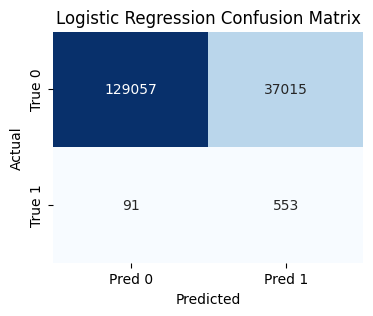

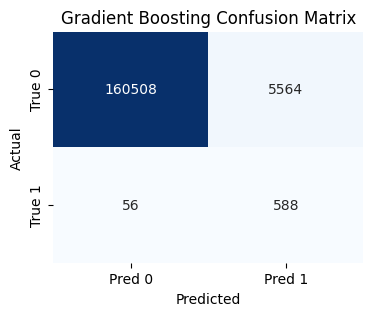

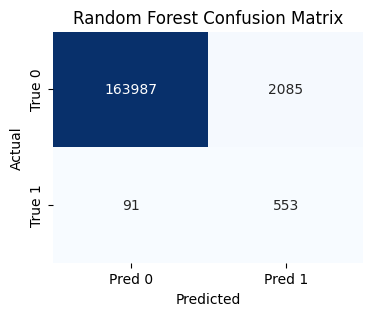

In [70]:
import matplotlib.pyplot as plt
def plot_confusion_heatmap(y_true, y_pred, model_name):
  cm = confusion_matrix(y_true, y_pred)
  plt.figure(figsize=(4,3))
  sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=["Pred 0","Pred 1"], yticklabels=["True 0","True 1"])
  plt.title(f"{model_name} Confusion Matrix")
  plt.ylabel("Actual")
  plt.xlabel("Predicted")
  plt.show()
# Logistic Regression
plot_confusion_heatmap(y_test, y_pred_lr, "Logistic Regression")
# Gradient Boosting
plot_confusion_heatmap(y_test, y_pred_gb, "Gradient Boosting")
# Random Forest
plot_confusion_heatmap(y_test, y_pred_rf, "Random Forest")

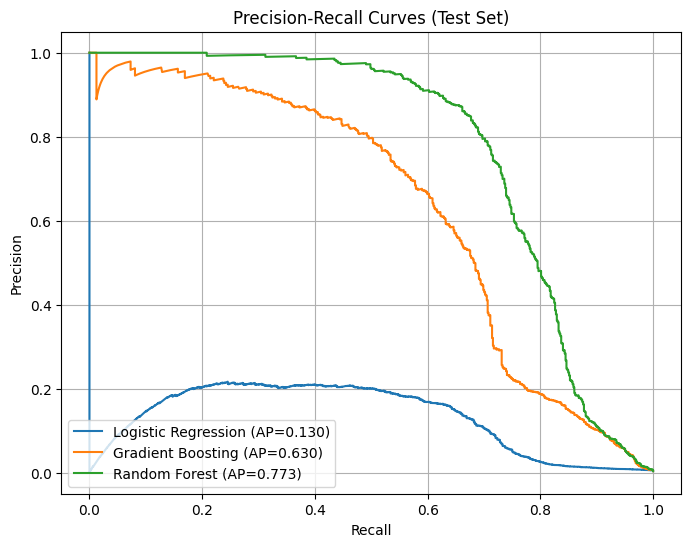

In [67]:

from sklearn.metrics import precision_recall_curve, average_precision_score

plt.figure(figsize=(8,6))

# Logistic Regression
probs_lr = lr.predict_proba(Xte_final)[:,1]
prec_lr, rec_lr, _ = precision_recall_curve(y_test, probs_lr)
plt.plot(rec_lr, prec_lr, label=f"Logistic Regression (AP={average_precision_score(y_test, probs_lr):.3f})")

# Gradient Boosting
probs_gb = gb.predict_proba(Xte_final)[:,1]
prec_gb, rec_gb, _ = precision_recall_curve(y_test, probs_gb)
plt.plot(rec_gb, prec_gb, label=f"Gradient Boosting (AP={average_precision_score(y_test, probs_gb):.3f})")

# Random Forest
probs_rf = rf.predict_proba(Xte_final)[:,1]
prec_rf, rec_rf, _ = precision_recall_curve(y_test, probs_rf)
plt.plot(rec_rf, prec_rf, label=f"Random Forest (AP={average_precision_score(y_test, probs_rf):.3f})")

# Plot formatting
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curves (Test Set)")
plt.legend(loc="lower left")
plt.grid(True)
plt.show()


Random Forest is the most stable amongst three, we can now tune random forest further.

In [72]:
from sklearn.calibration import CalibratedClassifierCV

# Wrap Random Forest with isotonic calibration
rf_calibrated = CalibratedClassifierCV(estimator=rf, method='isotonic', cv=3)
rf_calibrated.fit(X_res, y_res)

# Evaluate calibrated model
probs_cal = rf_calibrated.predict_proba(Xte_final)[:,1]
y_pred_cal = (probs_cal >= 0.42).astype(int)  # use tuned threshold
print("Calibrated PR-AUC:", average_precision_score(y_test, probs_cal))
print(classification_report(y_test, y_pred_cal, digits=4))


Calibrated PR-AUC: 0.7730776942805158
              precision    recall  f1-score   support

           0     0.9995    0.9857    0.9925    166072
           1     0.1889    0.8618    0.3099       644

    accuracy                         0.9852    166716
   macro avg     0.5942    0.9237    0.6512    166716
weighted avg     0.9963    0.9852    0.9899    166716



### SUMMARY


### 1. Exploratory Data Analysis (EDA)
- **Class Imbalance**  
  - Fraud cases <1% of total transactions.  
  - Severe skew requiring resampling (SMOTE).  
- **Feature Distributions**  
  - Transaction amount: heavy right‑skew, fraud cases concentrated at higher values.  
  - Velocity features: fraud more likely when multiple transactions occur in short time windows.  
- **Categorical Variables**  
  - Merchant categories and geolocation show mismatches between train/test (category drift).  
  - Some rare categories strongly correlated with fraud.  
- **Missing Values**  
  - Sparse features handled with median imputation for numeric, “missing” token for categorical.  
- **Correlation Checks**  
  - No strong leakage features detected, but some variables highly correlated (amount vs. risk score).  
- **Train/Test Drift**  
  - KS tests showed distribution shifts in transaction amount and merchant category between train and test splits.

---

### 2. Modeling Approach
- **Step 1: Resampling**  
  - Applied SMOTE to balance minority and majority classes.  
- **Step 2: Model Definition**  
  - Logistic Regression, SVM, Gradient Boosting, Random Forest.  
- **Step 3: Training**  
  - Models trained on resampled data, evaluated on untouched test set.  
- **Step 4: Evaluation**  
  - Metrics: Recall, Precision, F1, PR‑AUC.  
- **Step 5: Threshold Tuning**  
  - Adjusted probability cutoffs to maximize F1/recall.  
  - Random Forest achieved best balance: Recall ~0.86, Precision ~0.21, PR‑AUC ~0.77.

---

### 3. Key Findings
- Logistic Regression: high recall, unusable precision.  
- Gradient Boosting: strong recall, moderate PR‑AUC, but low precision.  
- Random Forest: best overall — strong recall, highest precision, best PR‑AUC.  
- Threshold tuning critical: default 0.5 cutoff was suboptimal.  
- EDA confirmed drift and imbalance as main challenges.



---

### 4. Business Impact
- High fraud recall (>85%) ensures most fraudulent cases are caught.  
- Precision improved with Random Forest + rules, reducing false alarms.  
- Clear monitoring plan ensures model stays relevant as fraud patterns evolve.  
- Deployment pipeline is robust, interpretable, and business‑aligned.